# Table of Contents
<br></br>
* [# 1. Business Challenge](#business-challenge)

* [# 2. Imports](#imports)

* [# 3. Exploratory Data Analysis](#exploratory-data-analysis)

    * [# 3.1: Data Description](#data-description)

    * [# 3.2: Data Cleaning](#data-cleaning)
   
        * [# 3.2.1: Missing Values](#missing-values)

        * [# 3.2.2: Outliers](#outliers)
        
* [# 4. Feature Engineering](#feature-engineering)

* [# 5. Data Quality](#data-quality)

* [# 6. Feature Selection](#feature-selection)

* [# 7. Data Modeling](#data-modeling)

    * [# 7.1 Scaler Selection](#scaler-selection)
    
    * [# 7.2 Model Performance](#model-performance)
    
    * [# 7.3 Cost Matrix](#cost-matrix)
    
    * [# 7.4 Tuned Models](#tuned-models)
    
    * [# 7.5 Tuned Models + Theoretical Threshold](#tuned-models-+-theoretical-threshold)
    
    * [# 7.6 ROC and Precision-Recall Curve](#roc-and-precision-recall-curves) 

* [# 8. Concluding Remarks](#concluding-remarks)

# Business Challenge

Problem description: It is observed that the reporting of information by companies can sometimes suffer some delays. The objective is to see if, based on the available attributes, it is possible to classify companies as being late in the report. Furthermore, it would be relevant to understand which attributes may be relevant for the attribution of this classification. For this purpose, the database includes continuous variables (variables of the “x” type), categorical variables (variables of the “c” type), and ordinals (variables of the “o” type).

# Imports

In [1]:
# Import the required libraries
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import scipy as sp
import itertools
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.ticker as mtick
import seaborn as sns
import datetime as dt
from sklearn.impute import KNNImputer
import statistics as st


# Modelling
from scipy import interp

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score

# Import standard libraries.
import calendar
import datetime as dt
import itertools
import random

# Import third party libraries.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from scipy import stats
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#import somoclu

# Exploratory Data Analysis

Data exploration consists on the critical process of performing initial investigations on original data so as to discover patterns, to spot outliers, to test hypothesis and to check assumptions with the help of summary statistics and graphical representations. This step is essential for a more straightforward view of the dataset, following which we can proceed with the feature engineering and the modelization parts of this project.

# Data Understanding

## Collect the data

In [2]:
# Import train and test dataset
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")


# Print the 10 first records
train_df.head(5)
#test_df.head(5)

i  y      x1      x2      x3      x4      x5      x6      x7      x8  \
0   2  0 -0.0229 -0.0250 -0.0173 -0.0269 -0.0181 -0.0330 -0.0248 -0.0244   
1   6  1 -0.0110 -0.0173 -0.0226 -0.0183 -0.0264 -0.0191  0.0136  0.0007   
2   9  0 -0.0278 -0.0294 -0.0223 -0.0239 -0.0259 -0.0281 -0.0272 -0.0266   
3  14  0 -0.0292 -0.0309 -0.0233 -0.0248 -0.0276 -0.0296 -0.0274 -0.0270   
4  21  0 -0.0300 -0.0317 -0.0259 -0.0274 -0.0317 -0.0339 -0.0380 -0.0375   

       x9     x10     x11     x12     x13     x14     x15     x16     x17  \
0 -0.0195 -0.0226 -0.0408 -0.0404 -0.0374 -0.0355 -0.0765 -0.0759 -0.0369   
1 -0.0232 -0.0268  0.6620  0.5405  0.6047  0.4188  0.1723  0.1172  0.0757   
2 -0.0250 -0.0277 -0.0417 -0.0407     NaN     NaN     NaN     NaN     NaN   
3 -0.0269 -0.0296 -0.0393 -0.0389 -0.0360 -0.0347 -0.0702 -0.0704 -0.0365   
4 -0.0224 -0.0243 -0.0417 -0.0407     NaN -0.0355 -0.0765     NaN     NaN   

      x18     x19     x20     x21     x22     x23     x24     x25     x26  \
0 -0.0354 -0.0273 -0.0280 -0.0877 -0.0916 -0.0930 -0.0944 -0.0191 -0.0173   
1  0.0058  0.0456  0.0019  0.3212  0.2810  0.4200  0.3337 -0.0191 -0.0173   
2 -0.0338 -0.0282 -0.0277 -0.0877 -0.0916 -0.0930 -0.0944 -0.0191 -0.0173   
3 -0.0359 -0.0290 -0.0294 -0.0756 -0.0796 -0.0802 -0.0820 -0.0191 -0.0173   
4     NaN -0.0279 -0.0294 -0.0877 -0.0916 -0.0930 -0.0944 -0.0191 -0.0173   

      x27     x28     x29     x30     x31     x32     x33     x34     x35  \
0 -0.0109 -0.0105 -0.0196 -0.0171 -0.0169 -0.0133 -0.1744 -0.0219 -0.0085   
1 -0.0109 -0.0105 -0.0196 -0.0171 -0.0169 -0.0133 -0.1744 -0.0219 -0.0085   
2 -0.0109 -0.0105 -0.0196 -0.0171 -0.0169 -0.0133 -0.1744 -0.0219 -0.0085   
3 -0.0109 -0.0105 -0.0196 -0.0171 -0.0169 -0.0133 -0.1744 -0.0219 -0.0085   
4 -0.0109 -0.0105 -0.0196 -0.0171 -0.0169 -0.0133 -0.1744 -0.0219 -0.0085   

      x36     x37  x38  x39  x40    c1   c2  c3  c4  c5  c6  c7  c8  c9  c10  \
0  0.1027 -1.9004  1.0  1.0  0.0  4120  412  41  20  22   2   4   0  20   22   
1  0.1027 -2.2449  1.0  1.0  0.0  4730  473  47  20  22   2   6   0  20   22   
2  0.1027 -2.4291  1.0  1.0  0.0  4759  475  47  20  22   2   8   0  20   22   
3  0.1027 -2.4291  1.0  1.0  0.0  5630  563  56  20  22   2   8   0  20   22   
4  0.1027 -2.1055  1.0  1.0  0.0  1320  132  13  20  22   2   8   0  20   22   

   c11  c12  o1  o2  
0    2    4  22   6  
1    2    6  24   6  
2    2    8  22   6  
3    2    8  22   6  
4    2    8  22   6

## Describe the data

In [3]:
# Get a description of the dataset: Column names, Non-null colums count and Date type
train_df.info()
#test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5832 entries, 0 to 5831
Data columns (total 56 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   i       5832 non-null   int64  
 1   y       5832 non-null   int64  
 2   x1      5832 non-null   float64
 3   x2      5832 non-null   float64
 4   x3      5828 non-null   float64
 5   x4      5824 non-null   float64
 6   x5      5828 non-null   float64
 7   x6      5824 non-null   float64
 8   x7      5829 non-null   float64
 9   x8      5830 non-null   float64
 10  x9      5740 non-null   float64
 11  x10     5728 non-null   float64
 12  x11     5831 non-null   float64
 13  x12     5829 non-null   float64
 14  x13     3669 non-null   float64
 15  x14     3681 non-null   float64
 16  x15     4776 non-null   float64
 17  x16     4766 non-null   float64
 18  x17     4199 non-null   float64
 19  x18     4189 non-null   float64
 20  x19     5831 non-null   float64
 21  x20     5832 non-null   float64
 22  

The dataset contains the following data types:
- <u>Numeric variables</u>: from x1 to x40
- <u>Categorical Variables</u>: from c1 to c12
- <u>Ordinal varibles</u>: o1 and o2


  There are 5832 observations in this dataset, each representing a company that delivered a given report to Banco de Portugal.
  As seen above, for each observation the dataset records 40 numerical variables, 12 categorical variables and 2 ordinal variables. We do not know the meaning behind each of those variables as that information was not provided.
  The target variable, y, is a single binary variable that denotes “yes” or 1, if the company has sent the report behind the schedule, and "no" or 0, if the company has delivered it on time.

In [4]:
dataTypeDict = dict(train_df.dtypes)
print('Data type of each column of Dataframe :')
print(dataTypeDict)

Data type of each column of Dataframe :
{'i': dtype('int64'), 'y': dtype('int64'), 'x1': dtype('float64'), 'x2': dtype('float64'), 'x3': dtype('float64'), 'x4': dtype('float64'), 'x5': dtype('float64'), 'x6': dtype('float64'), 'x7': dtype('float64'), 'x8': dtype('float64'), 'x9': dtype('float64'), 'x10': dtype('float64'), 'x11': dtype('float64'), 'x12': dtype('float64'), 'x13': dtype('float64'), 'x14': dtype('float64'), 'x15': dtype('float64'), 'x16': dtype('float64'), 'x17': dtype('float64'), 'x18': dtype('float64'), 'x19': dtype('float64'), 'x20': dtype('float64'), 'x21': dtype('float64'), 'x22': dtype('float64'), 'x23': dtype('float64'), 'x24': dtype('float64'), 'x25': dtype('float64'), 'x26': dtype('float64'), 'x27': dtype('float64'), 'x28': dtype('float64'), 'x29': dtype('float64'), 'x30': dtype('float64'), 'x31': dtype('float64'), 'x32': dtype('float64'), 'x33': dtype('float64'), 'x34': dtype('float64'), 'x35': dtype('float64'), 'x36': dtype('float64'), 'x37': dtype('float64'), '

The numerical variables are represented as float type (i.e., a number with decimal points) while the remaining -  categorical and numerical variables, as well as the dependent variable "y" - are represented as integer type (i.e., a whole number without decimals).

In [5]:
# Describe the numerical variables
train_df_numerical = train_df.drop(["i","c1","c2","c3","c4","c5","c6","c7","c8","c9","c10","c11","c12","o1","o2"], axis = 1)
train_df_numerical.describe(include = [np.number]).T

count      mean       std      min     25%     50%       75%      max
y    5832.0  0.356481  0.479001   0.0000  0.0000  0.0000  1.000000   1.0000
x1   5832.0  0.012788  0.450840  -0.0332 -0.0300 -0.0280 -0.021100  25.6717
x2   5832.0  0.013650  0.466789  -0.0357 -0.0316 -0.0294 -0.021800  26.5163
x3   5828.0  0.021443  0.916463  -0.0259 -0.0259 -0.0253 -0.021100  57.9592
x4   5824.0  0.021007  0.917759  -0.0274 -0.0274 -0.0267 -0.022000  57.4814
x5   5828.0  0.029248  1.233137  -0.0317 -0.0317 -0.0308 -0.024800  78.7026
x6   5824.0  0.028652  1.235146  -0.0339 -0.0339 -0.0328 -0.026100  77.9888
x7   5829.0  0.012141  0.482383  -6.3705 -0.0312 -0.0297 -0.023200  20.4735
x8   5830.0  0.010167  0.450497  -6.0426 -0.0306 -0.0289 -0.022200  19.3758
x9   5740.0  0.011334  0.468664  -0.0272 -0.0263 -0.0245 -0.018200  29.0541
x10  5728.0  0.013762  0.519346  -0.0302 -0.0289 -0.0268 -0.019500  32.1771
x11  5831.0  0.033796  0.886308  -0.0417 -0.0408 -0.0374 -0.025850  48.1856
x12  5829.0  0.030309  0.836766  -0.0407 -0.0397 -0.0364 -0.025600  44.6606
x13  3669.0  0.020839  0.630551  -0.0374 -0.0369 -0.0347 -0.026800  23.1899
x14  3681.0  0.016429  0.581071  -0.0355 -0.0350 -0.0331 -0.025400  21.1847
x15  4776.0  0.081871  1.308704  -0.0765 -0.0713 -0.0619 -0.033275  39.6147
x16  4766.0  0.077345  1.304542  -0.0759 -0.0707 -0.0611 -0.034125  38.9698
x17  4199.0  0.013464  0.547442 -12.4431 -0.0362 -0.0338 -0.023600  21.4896
x18  4189.0  0.017386  0.653409  -6.7417 -0.0351 -0.0325 -0.020800  27.0397
x19  5831.0  0.018448  1.082577 -22.3462 -0.0281 -0.0263 -0.019400  73.0341
x20  5832.0  0.019702  1.120903 -12.4559 -0.0296 -0.0278 -0.020700  77.9144
x21  5442.0  0.042785  0.933981  -0.0877 -0.0756 -0.0636 -0.027500  46.2245
x22  5454.0  0.043170  0.904762  -0.0916 -0.0796 -0.0676 -0.031500  38.6694
x23  5410.0  0.042988  0.928510  -0.0930 -0.0802 -0.0661 -0.024900  45.1824
x24  5419.0  0.042211  0.957102  -0.0944 -0.0820 -0.0677 -0.027200  46.3315
x25  5832.0  0.013774  0.521793  -0.0191 -0.0191 -0.0191 -0.019100  21.9866
x26  5832.0  0.010467  0.444568  -0.0173 -0.0173 -0.0173 -0.017300  20.0467
x27  5832.0  0.016471  0.503801  -0.0109 -0.0109 -0.0109 -0.010900  30.4900
x28  5832.0  0.017565  0.546671  -0.0105 -0.0105 -0.0105 -0.010500  34.7421
x29  5832.0  0.018368  0.459839  -0.0196 -0.0196 -0.0196 -0.019600  14.2027
x30  5832.0  0.012275  0.339616  -0.0171 -0.0171 -0.0171 -0.017100  10.6506
x31  5832.0  0.026313  1.158994  -0.0169 -0.0169 -0.0169 -0.016900  84.4598
x32  5832.0  0.019620  0.859920  -0.0133 -0.0133 -0.0133 -0.013300  62.7404
x33  5832.0  0.085159  1.100810  -3.1299 -0.1744 -0.1744 -0.174400   8.5954
x34  5832.0  0.584409  3.408172 -15.3422 -0.0219 -0.0219 -0.021900  38.1534
x35  5832.0  0.726413  4.245658 -29.2504 -0.0085 -0.0085 -0.008500  28.7567
x36  5832.0  0.208129  1.355627 -13.9912  0.1027  0.1027  0.102700   7.1303
x37  5807.0 -4.173895  1.202239  -6.9177 -4.9718 -3.9733 -3.306800  -1.6345
x38  5832.0  0.983270  0.103397   0.0055  1.0000  1.0000  1.000000   1.0000
x39  5832.0  0.994196  0.061193   0.0027  1.0000  1.0000  1.000000   1.0000
x40  5832.0  0.033992  0.234900   0.0000  0.0000  0.0000  0.000000   4.3175

The table above is important to have a first picture of the numerical variables. 
For example, we can see that the mean values for each numerical variables (with exception of x37) are around 0 and 1, so we know we are dealing with relatively small numbers (could they represent financial ratios of the companies?). For most of them, we also know that they can assume negative numbers. Given what we know already of the mean of the variables, we can already assume that for many of them there will be extreme outliers, as there are min and (especially) max values particularly far from the mean (see for example x19, x31 or x35). Other hint suggesting significant outliers can be taken from the quantiles columns, whose values are relatively close to the respective mean - which would be suggest that the variable distribution is very concentrated around the mean but with the presence of some very extreme outliers far from there. Taking a look at the Count column we can also confirm there will be some variables where the null data will have a significant extension, as it happens, for instance, for variables x13 (with less 2163 observations) or x17 (with less 1633 observations).

This was just data analysis at a glance - both the outliers and the null data will be thoroughly analysed later in this section.

In [6]:
#Check por unique records
print(train_df["i"].nunique())

5832


In [7]:
train_df.nunique()

i      5832
y         2
x1      872
x2      879
x3      738
x4      763
x5      835
x6      878
x7     1041
x8     1048
x9      808
x10     857
x11    1021
x12     991
x13     655
x14     643
x15    1358
x16    1338
x17     887
x18     899
x19    1100
x20    1110
x21     164
x22     164
x23    1587
x24    1574
x25     327
x26     324
x27     348
x28     347
x29     406
x30     397
x31     367
x32     346
x33     146
x34      12
x35      11
x36      69
x37      92
x38     143
x39      64
x40      23
c1      418
c2      202
c3       73
c4        4
c5        3
c6        2
c7        4
c8        2
c9        5
c10       4
c11       4
c12       4
o1        4
o2       19
dtype: int64

From the unique values list above we can understand some interesting facts:
    
    - variable x23 has the highest number of different values, with 27% (1587) of its total observations being unique;
    
    - the last numerical variables of the dataset (x34 onwards) have less unique values than the other numerical variables;
    
    - the first categorical variables of the dataset (c1, c2 and c3) have an unusal high number of unique values for a typical categorical variable.
    
Even though it is just a simple reading of the data, being aware of this unique.values list enables us to better understand what to expect from our analysis later in our project, namely in scatter plots or histograms.

In [8]:
print(train_df.shape)
print(test_df.shape)

(5832, 56)
(5834, 56)


As already mentioned, we have 5832 observations and 54 variables (the other 2 refer to "i" and "y" variables)

# Explore the data

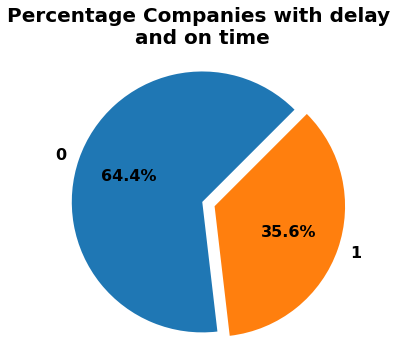

In [9]:
#Create a target variable to see if the datast is unbalanced 
target = train_df["y"].copy()

# Let's check whether our target classes are balanced.

# Set wedge labels and sizes.
wedge_labels = 0,  1
wedge_sizes = [1 - target.mean(), target.mean()]

# Initialize a new figure.
fig, ax = plt.subplots()

# Draw the pie chart.
ax.pie(x=wedge_sizes,
           explode=(0, 0.15),
           labels=wedge_labels,
           autopct='%1.1f%%',
           startangle=45,
           radius=1.5,
           textprops={'size': 16, 'weight': 'bold'}
          )

ax.set_title('Percentage Companies with delay \nand on time', y=1.20, size=20, weight='bold')

plt.show()
plt.close()

Taking a look at the dependent variable, we can see that more than 35% of the companies delivered the report behind the schedule (y=1) while 64% sent it on time (y=0).

In [10]:
# Check missing values

def null_analysis(df):
  '''
  desc: get nulls for each column in counts & percentages
  arg: dataframe
  return: dataframe
  '''
  null_cnt = train_df.isnull().sum() # calculate null counts
  null_cnt = null_cnt[null_cnt!=0] # remove non-null cols
  null_percent = null_cnt / len(df) * 100 # calculate null percentages
  null_table = pd.concat([pd.DataFrame(null_cnt), pd.DataFrame(null_percent)], axis=1)
  null_table.columns = ['counts', 'percentage']
  null_table.sort_values('counts', ascending=False, inplace=True)
  return null_table

# visualise null table
import plotly.express as px
null_table = null_analysis(train_df)
px.bar(null_table.reset_index(), x='index', y='percentage', text='counts', height=500)

From this bar chart we have a deeper look at the null data throughout the variables. This is a serious issue for several features - for example, the null data in x13 and x14 assume more than 35% of the observations.  

In [11]:
def FindOutliers(df):
    outliers = pd.DataFrame(columns=['col', 'mild', 'extreme', 'mild%', 'extreme%', 'count'])
    
    for column in df.columns:
        Q1 = df[column].quantile(.25)
        Q3 = df[column].quantile(.75)
        IQR = Q3-Q1
        mild_lower_limit = Q1-(1.5*IQR)
        mild_upper_limit = Q3+(1.5*IQR)
        extreme_lower_limit = Q1-(3*IQR)
        extreme_upper_limit = Q3+(3*IQR)

        extreme = df[column].map(lambda val :
                                 1 if pd.notnull(val) and
                                 (val >= extreme_upper_limit or val <= extreme_lower_limit)
                                 else 0).sum()
        mild = df[column].map(lambda val :
                                 1 if pd.notnull(val) and
                                 (val >= mild_upper_limit or val <= mild_lower_limit) and
                                 (val < extreme_upper_limit and val > extreme_lower_limit)
                                 else 0).sum()
        count = df[column].notnull().sum()
        outliers.loc[len(outliers.index)] = [column, mild, extreme, mild/count*100, extreme/count*100, count]
        #print(mild_lower_limit, mild_upper_limit, extreme_lower_limit, extreme_upper_limit)
        #print(count, mild, extreme)

    outliers = outliers.drop(outliers[outliers.mild == 0].index)
    outliers = outliers.drop([42,43,44,48,53], axis = 0)
    return outliers

outliers = FindOutliers(train_df)
#print(outliers)

import plotly.express as px
px.bar(outliers.reset_index(), x='col', y=['mild%', 'extreme%'], title = 'Outliers', height=500, hover_data=['mild', 'extreme', 'count'])

Similar to the null chart, here we have a bar chart counting the number of mild (Interquartile Range (IQR) = 1.5) and extreme (IQR = 3) outliers for each numerical variable. We can see that for many features the outliers represent from 12% to more than 16% of the observations, of which the extreme outliers assume the biggest part. This significant dimension of the outliers will be the reason why the outputs of the typical graphical tools used to analyse the dispersion and distribution of variables will be so unusual and difficult to interpret. The next exercise is an example of that.

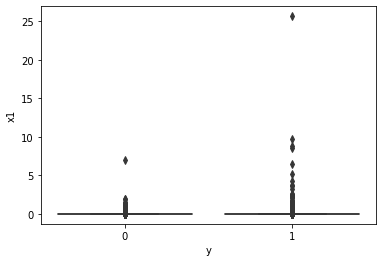

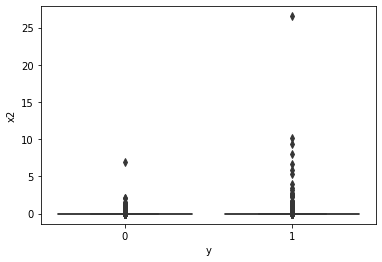

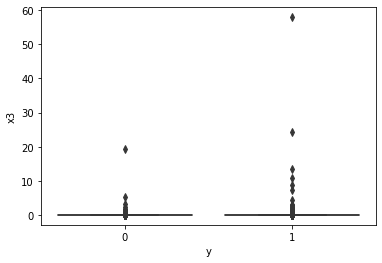

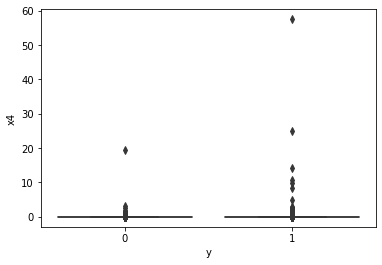

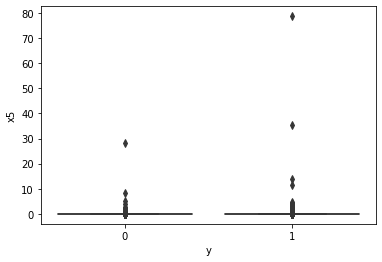

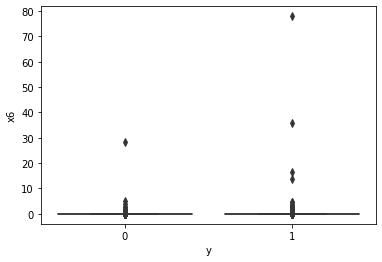

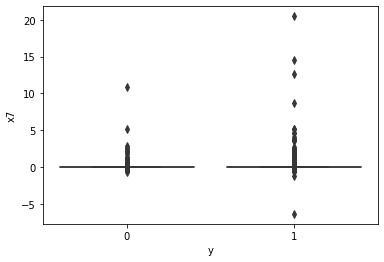

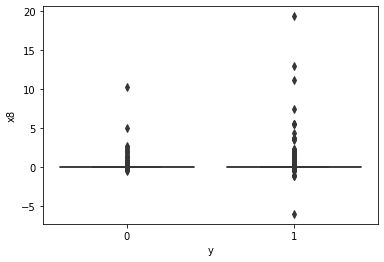

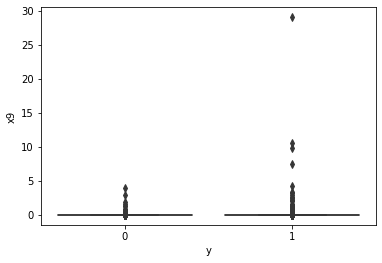

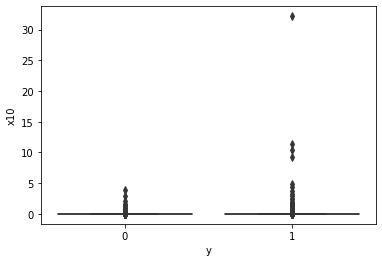

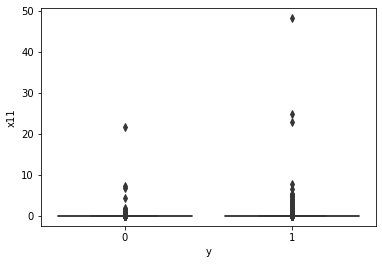

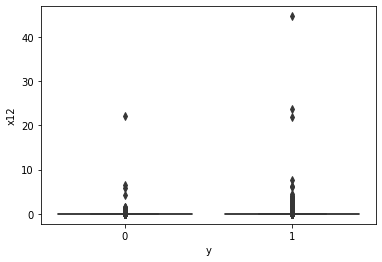

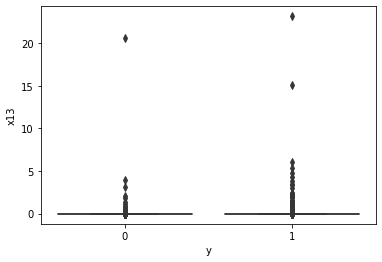

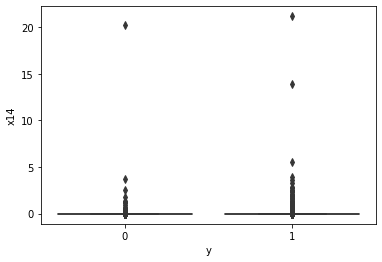

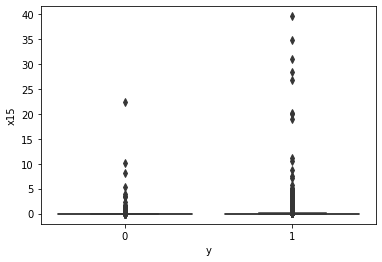

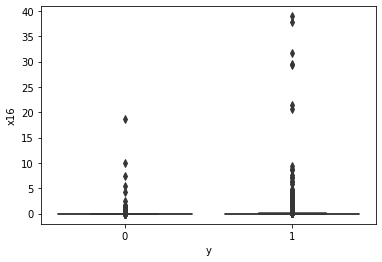

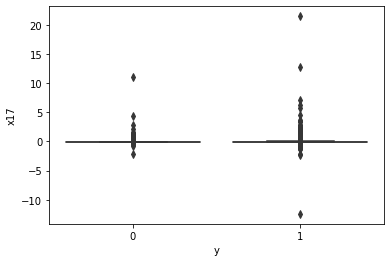

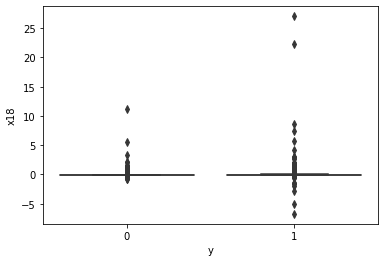

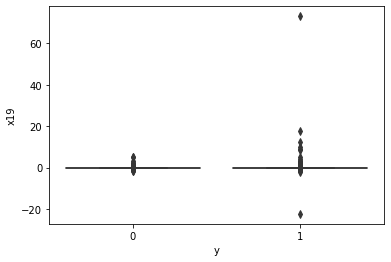

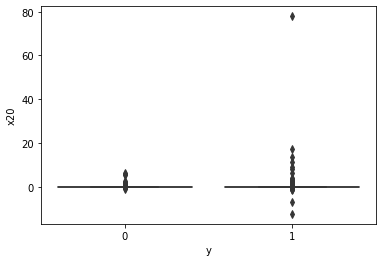

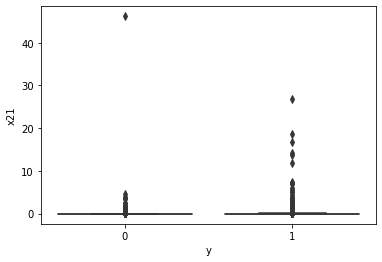

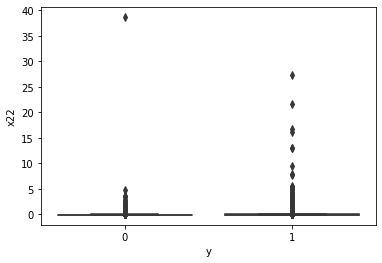

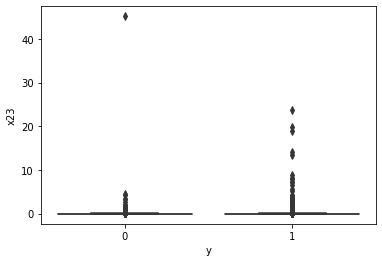

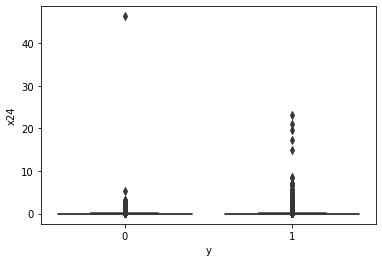

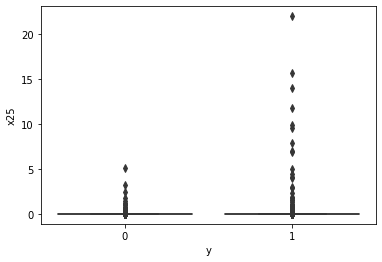

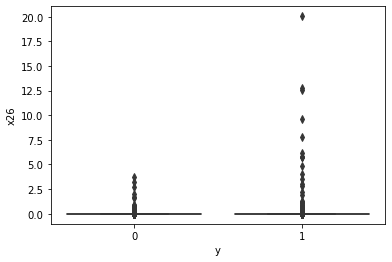

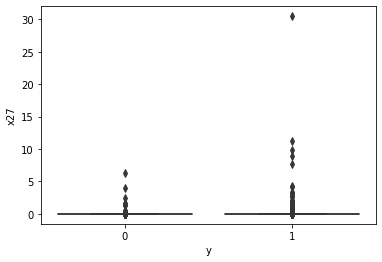

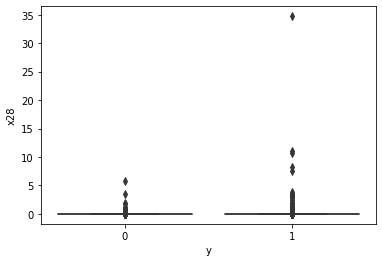

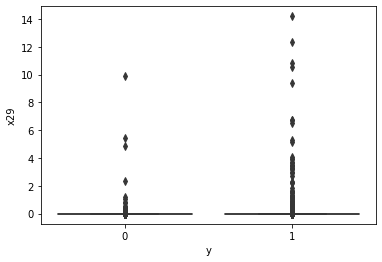

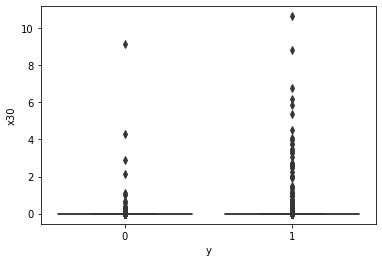

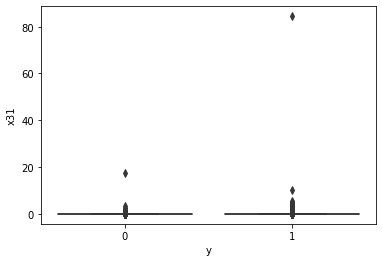

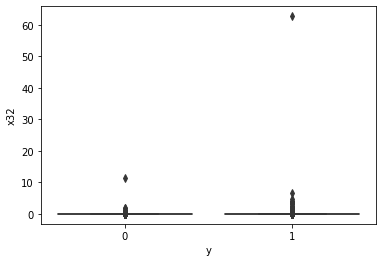

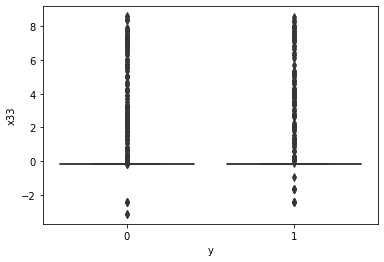

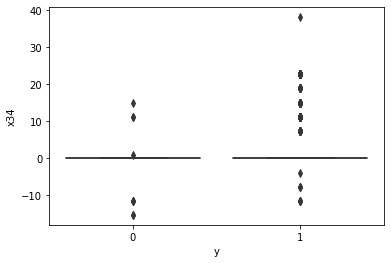

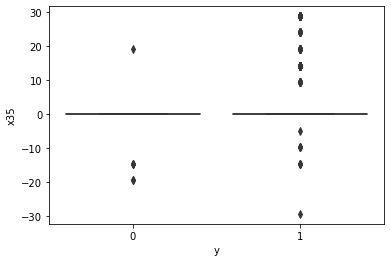

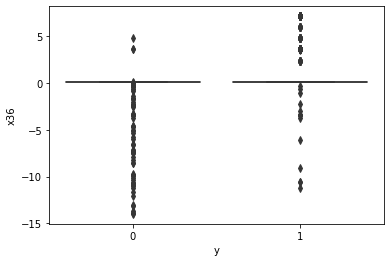

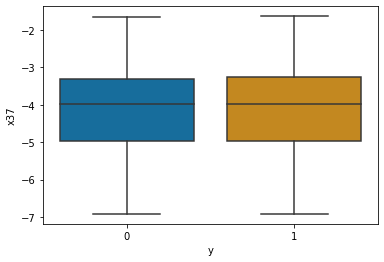

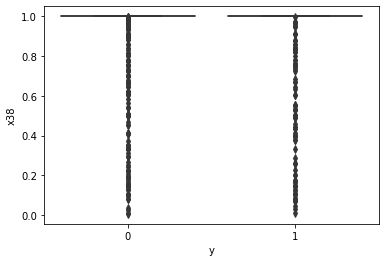

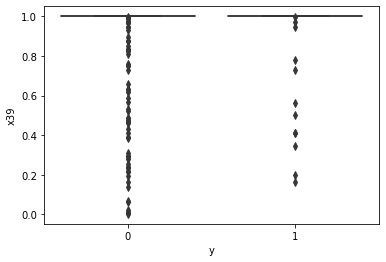

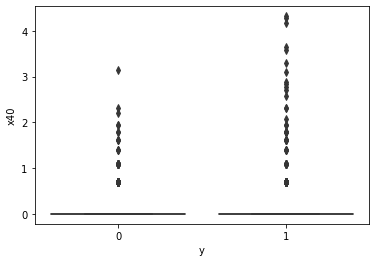

In [12]:
columns = train_df.columns[2:42]

for column in columns:
    
    sns.boxplot(y=column, x=train_df["y"], 
                 data=train_df, 
                 palette="colorblind",
               )
    plt.show()

In order to understand the dispersion of each variable observations when y=0 and y=1, we have created boxplots between the dependant variable against each one of the variables. For those who find those graphs above somewhat different from the usual boxplots we must remember that the quartiles (whose values define the limits of the "box" in a boxplot) are close to the mean, especially when comparing with the long distance to the extreme outliers. So it is a question of scale that explains why the boxes do not appear in the boxplots (again, with exception for the x37, whose representation assumes the typical forrm). 

Generally speaking, we can observe that the dispersion of the variables is higher for companies that did not deliver the report on time (i.e., when y=1), with some particularly (even more) extreme outliers appearing when y=1. One general conclusion we may take from this is that the profile of the companies that sent the report on time is relatively "more" homogeneous than those that did not send it on time. But we must be careful because even this conclusion is not too strong as there are still many extreme outliers when y=0. As we have seen, outliers constitute an serious issue throughout the database and eventually we will have to proceed with an inputing method for these values later on.

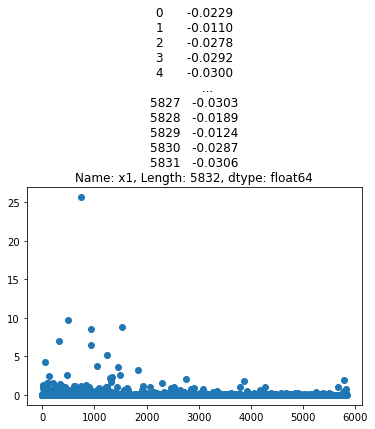

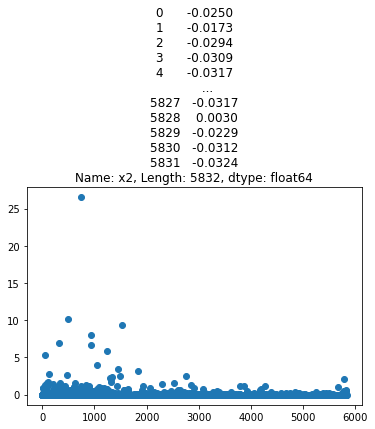

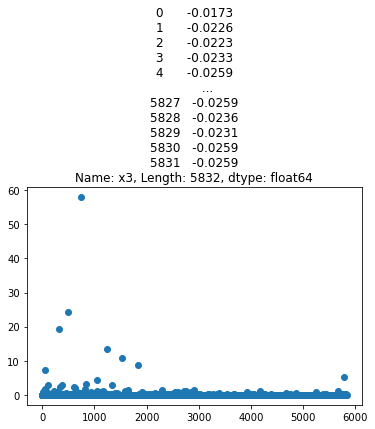

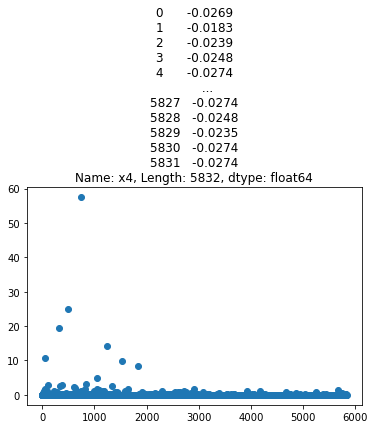

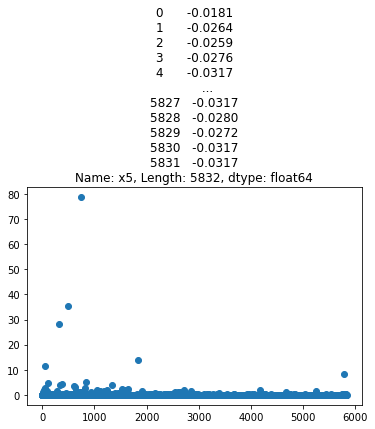

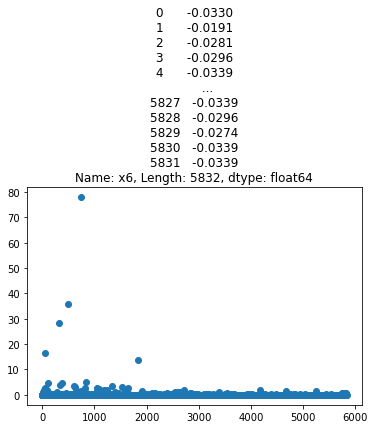

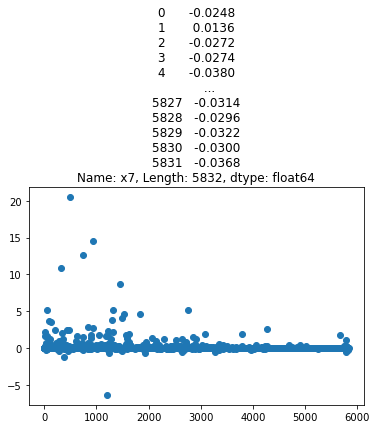

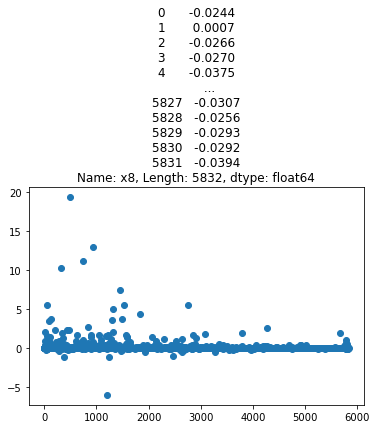

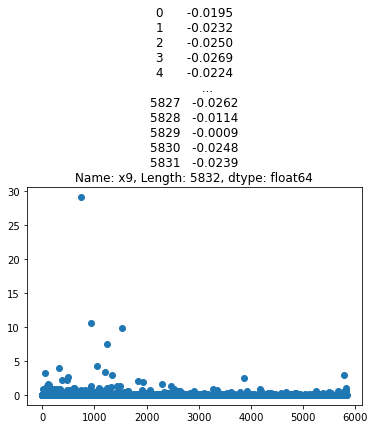

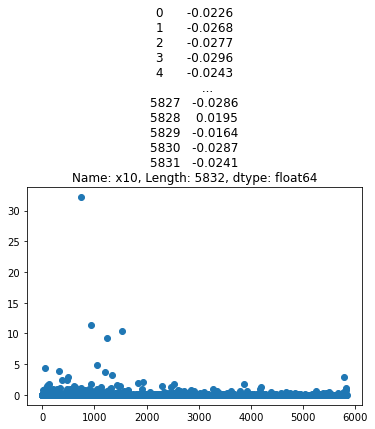

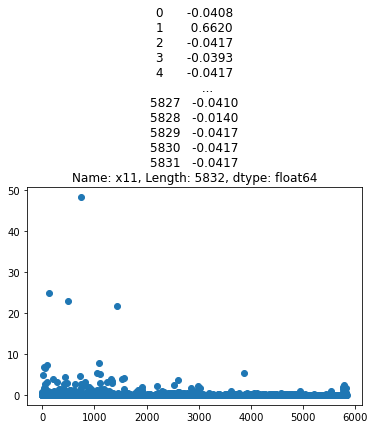

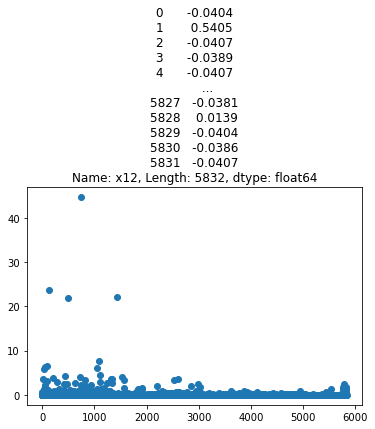

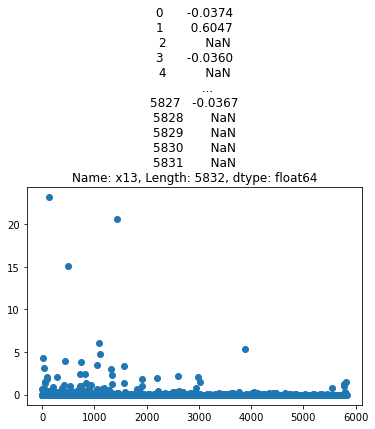

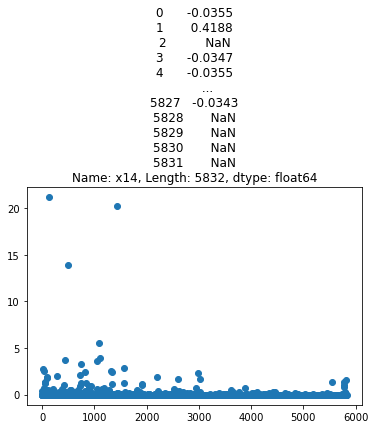

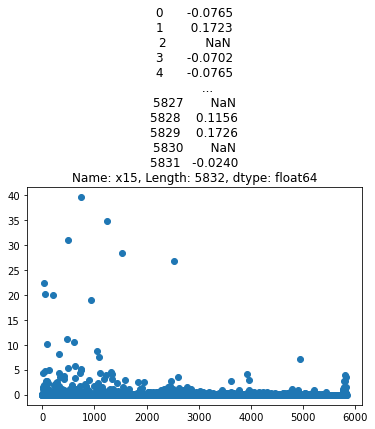

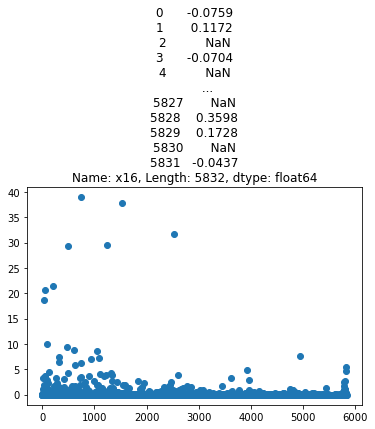

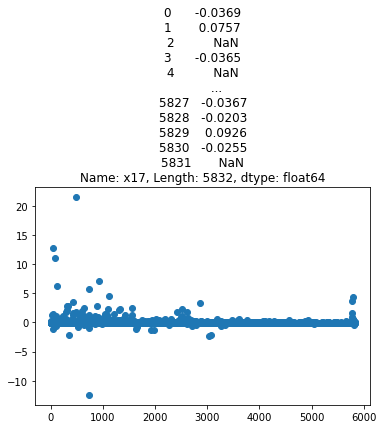

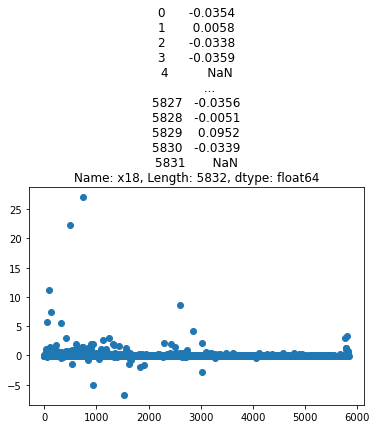

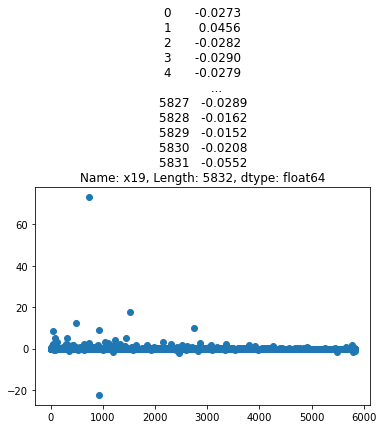

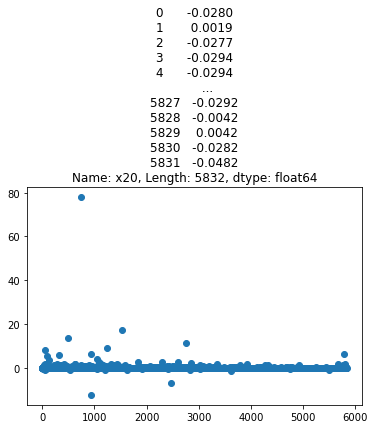

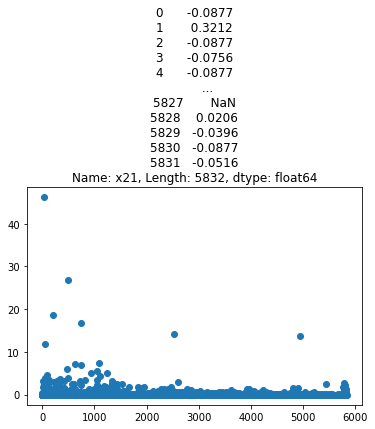

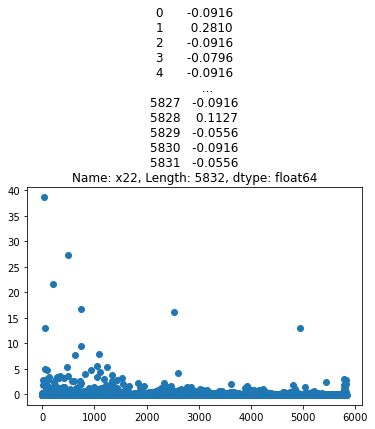

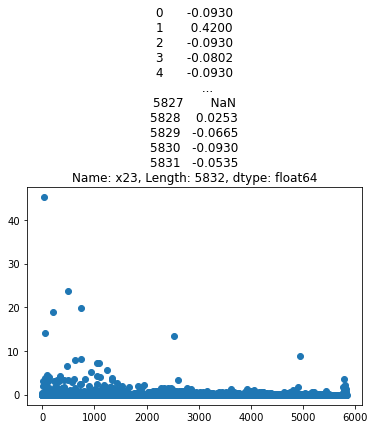

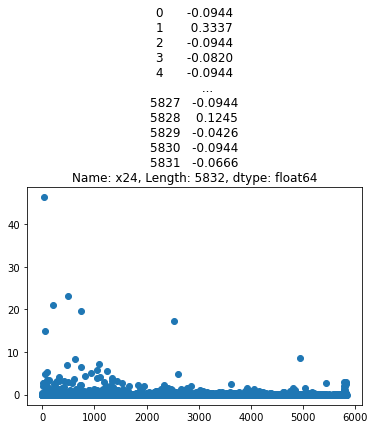

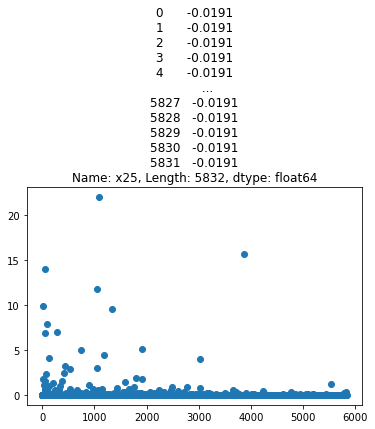

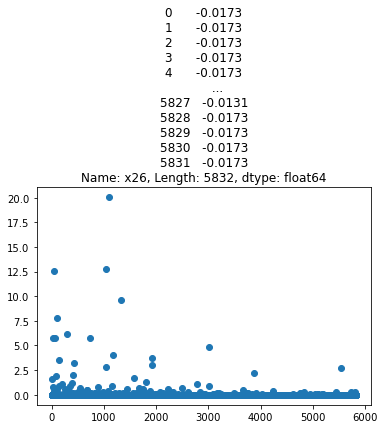

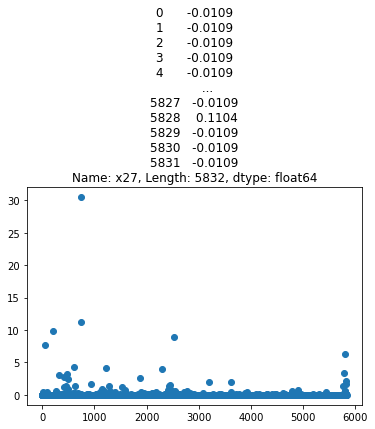

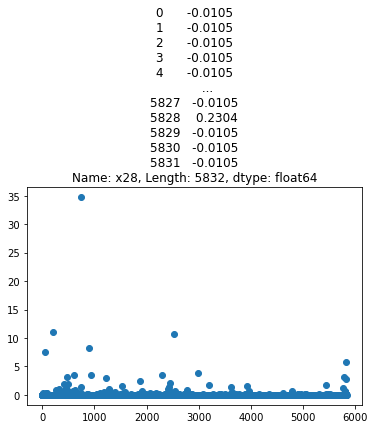

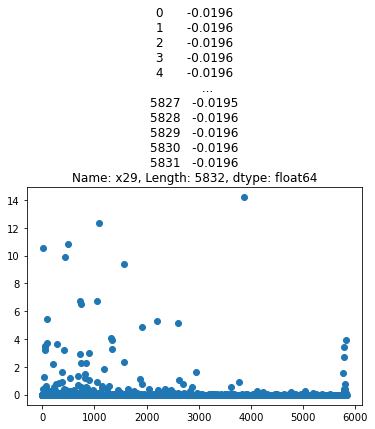

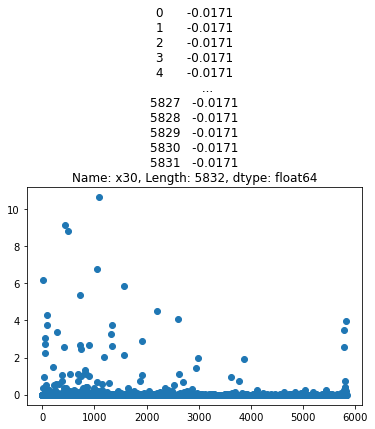

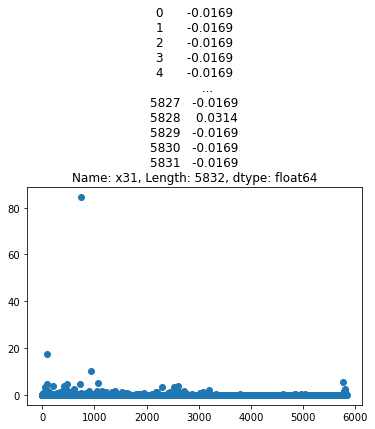

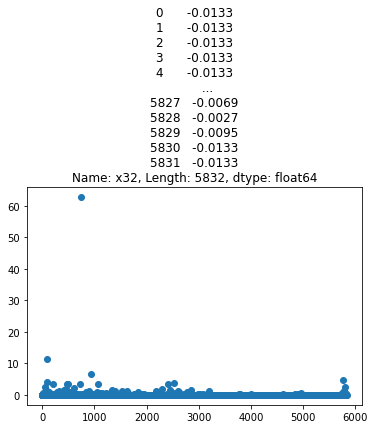

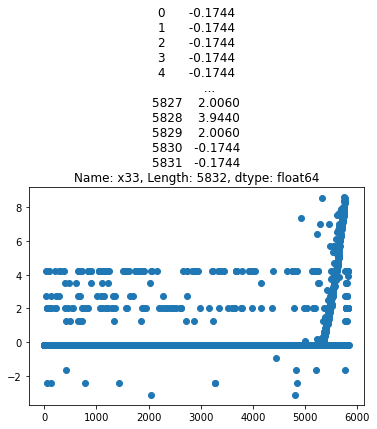

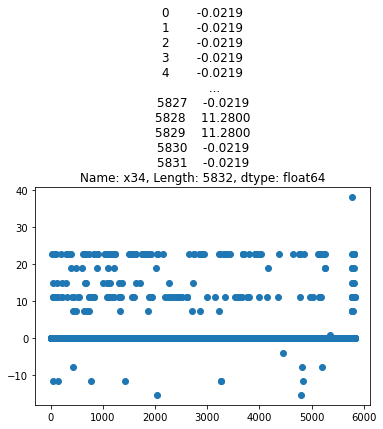

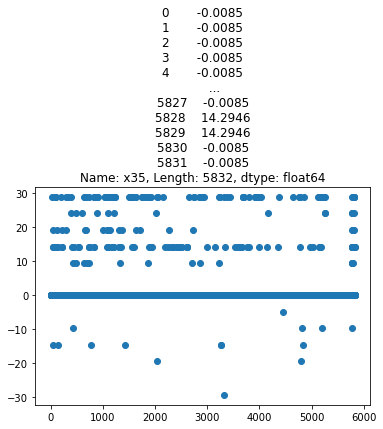

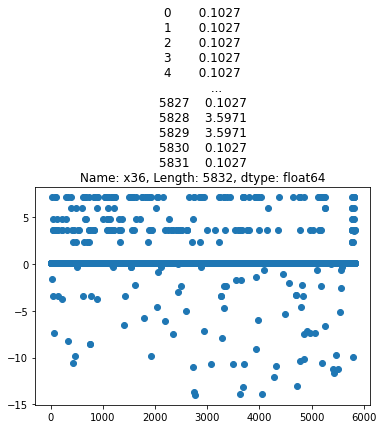

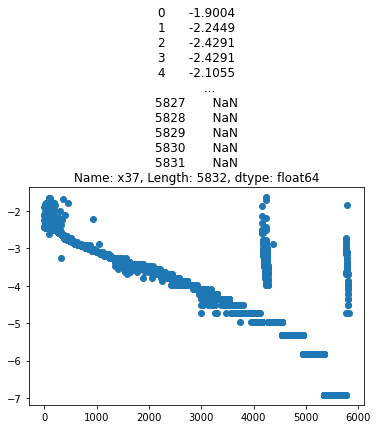

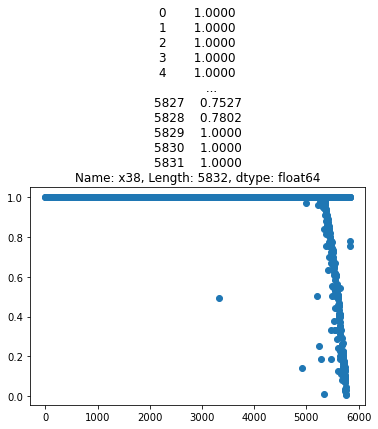

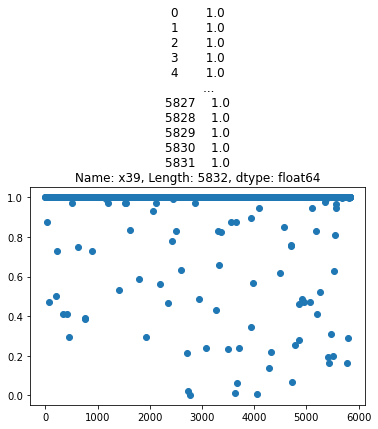

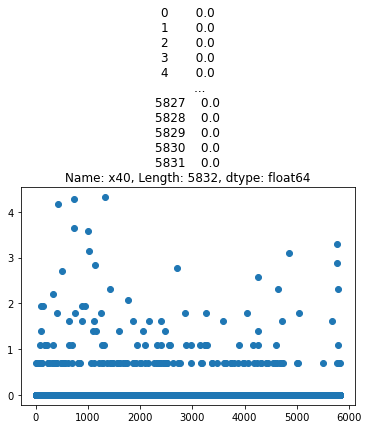

In [13]:
columns = train_df.columns[2:42]

for column in columns:
    
    plt.scatter(train_df.index,train_df[column])
    plt.title("{}".format(train_df[column]))
    plt.show()

Another way to see the dispersion of a variable is through a scatter plox. We call the attention for the axes interpretation: x represents the position of the company in the database (so, from 1 to 5832), which is not too relevant apart from a clearer visualization; y represents the value of the observations, i.e., the dispersion of the variable. And indeed these scatter plots above allow us to have a clear picture on the dispersion and a confirmation of the analysis we did for the boxplots. As we have seen, most of the observations sit around 0 (notice the width of the line close to axis y=0, that is where most of the observations are). But all variables have some (extreme) outliers that inevitably marks the perception of the graphics. Another fact that we can retrieve from the analysis to the scatter plots is that only a minority of the outliers are in the negative side which again might induce us to think of these variables as some kind of financial or economical ratios of the companies.

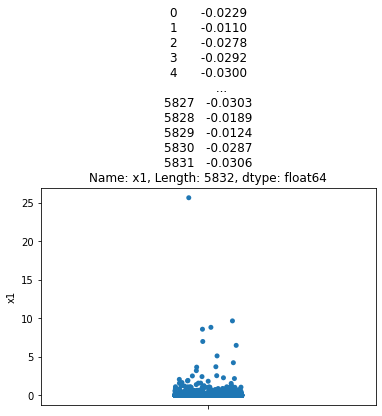

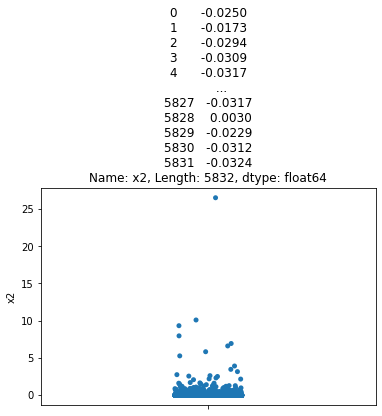

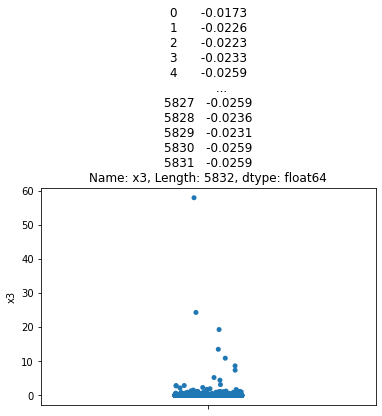

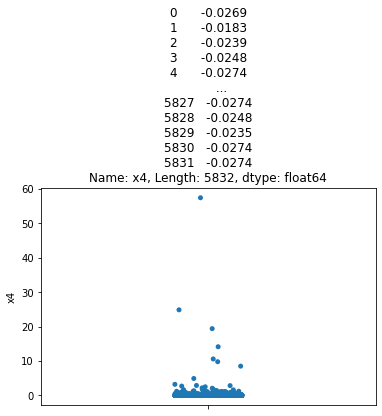

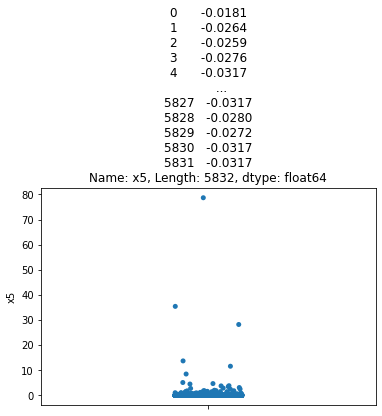

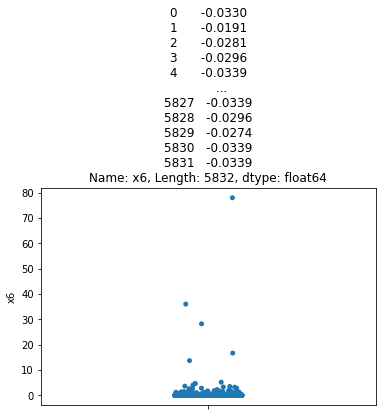

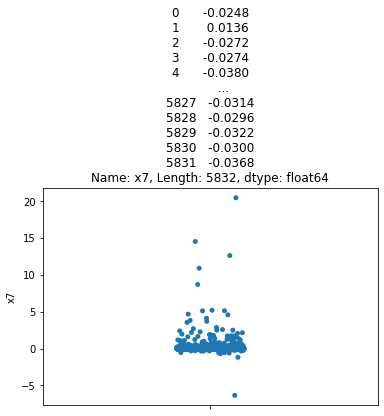

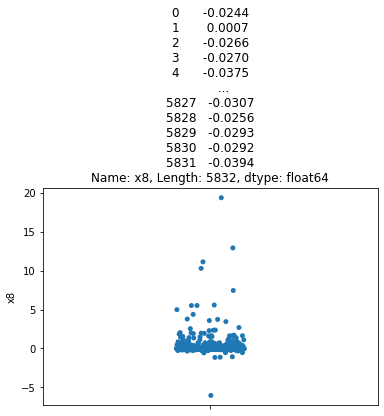

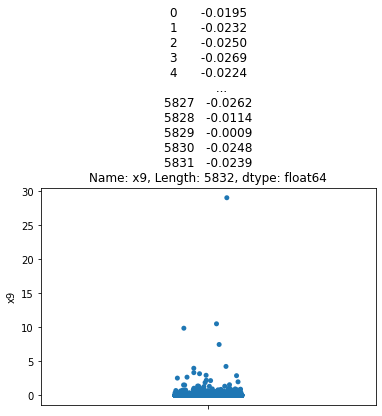

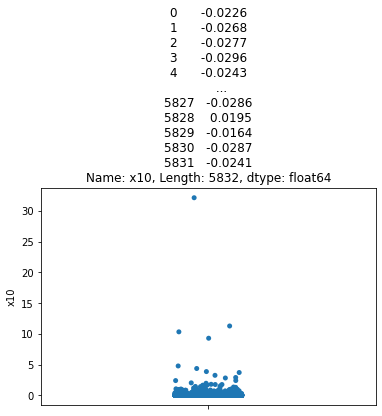

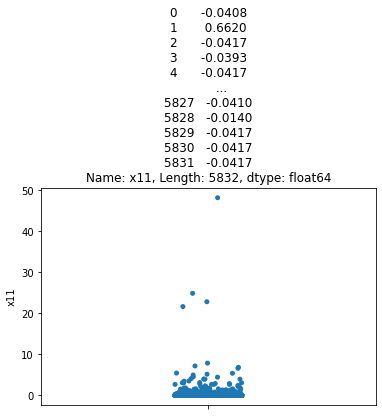

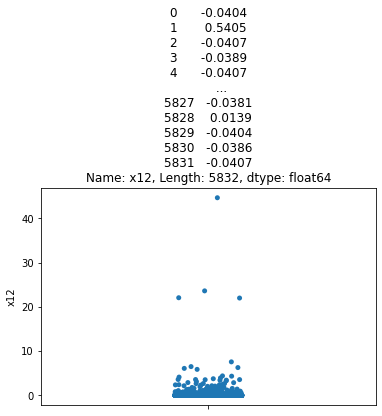

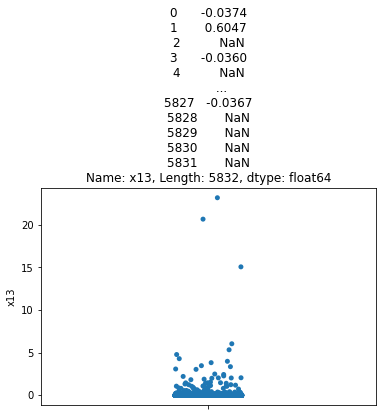

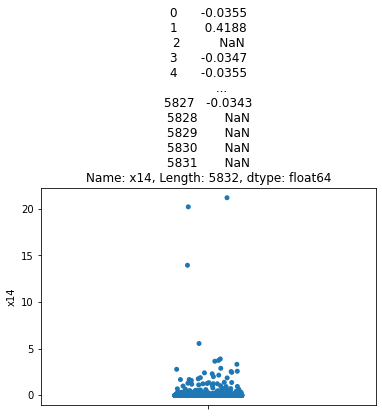

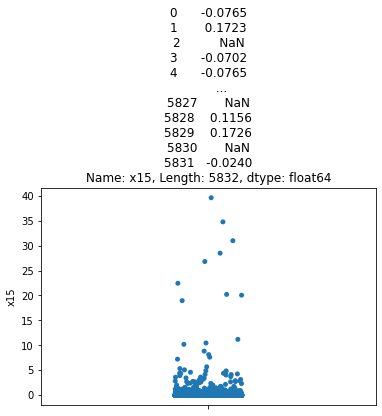

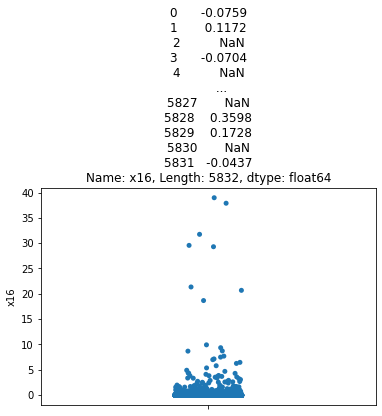

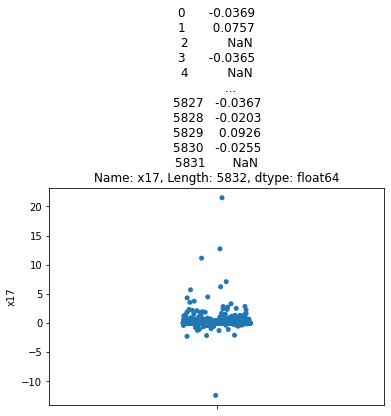

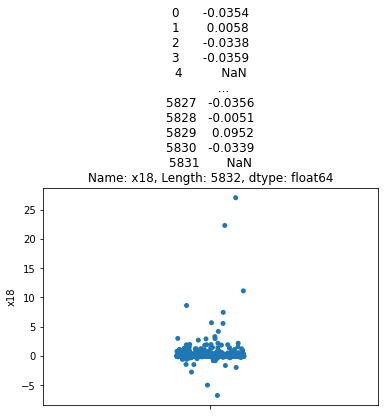

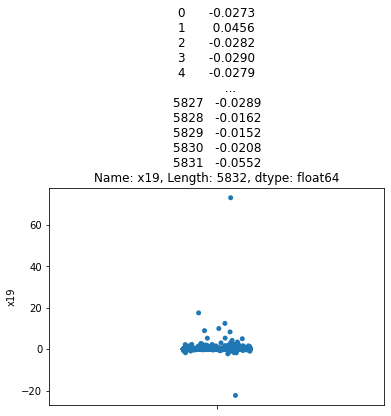

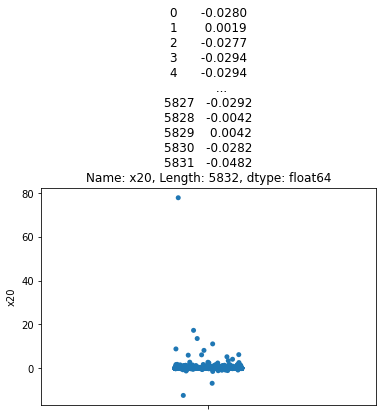

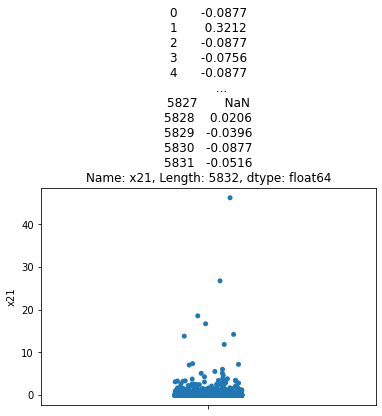

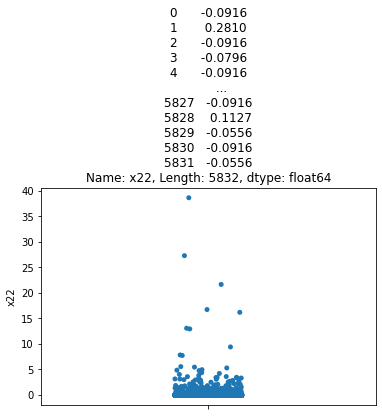

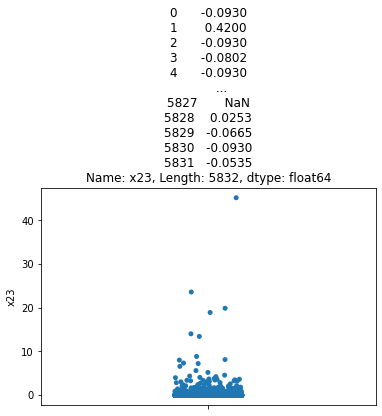

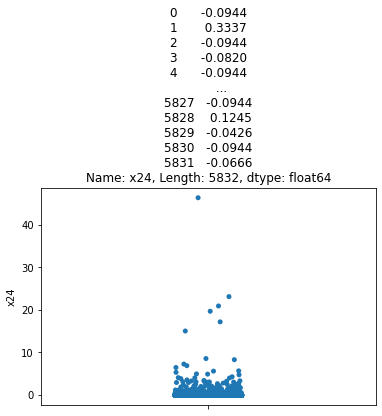

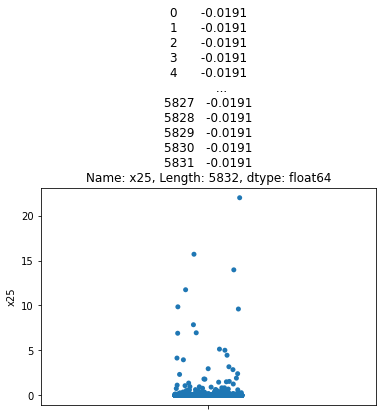

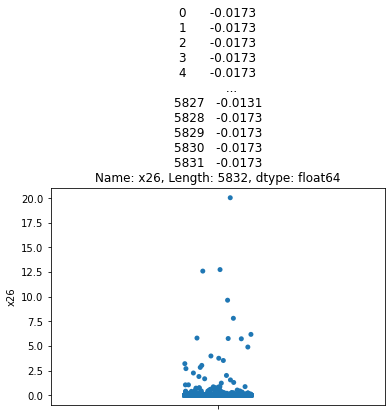

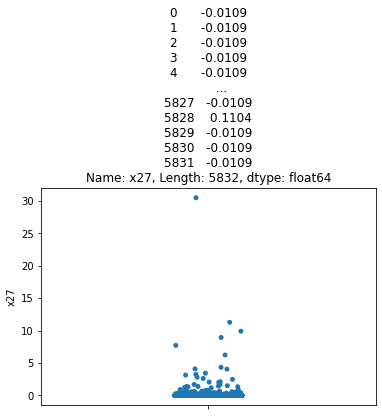

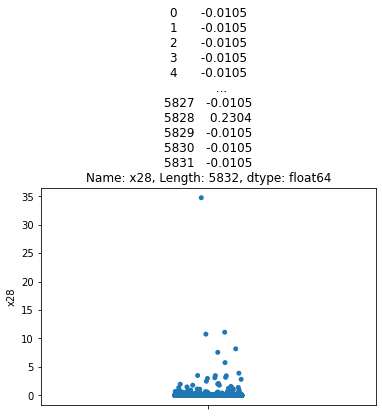

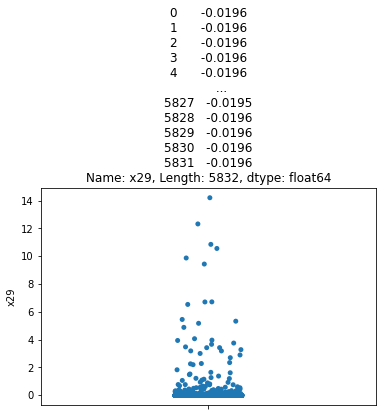

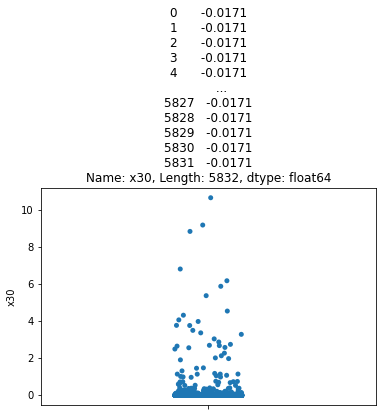

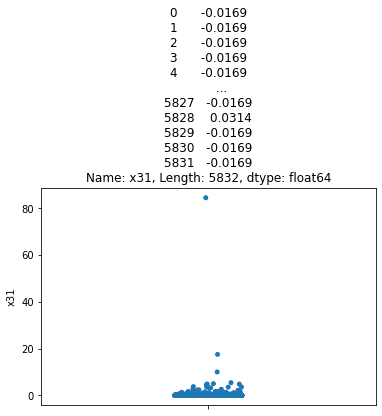

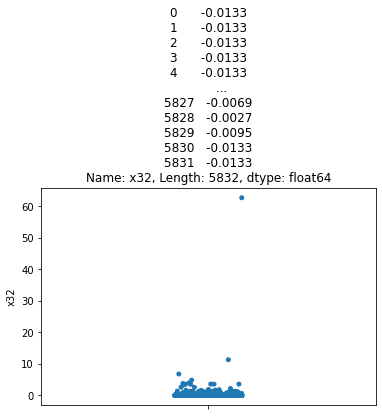

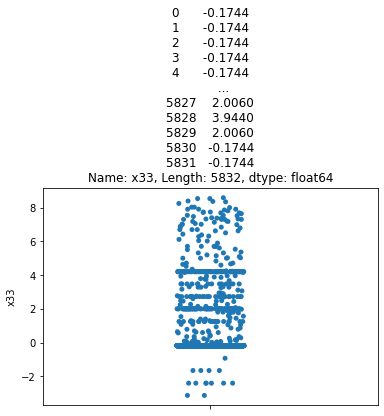

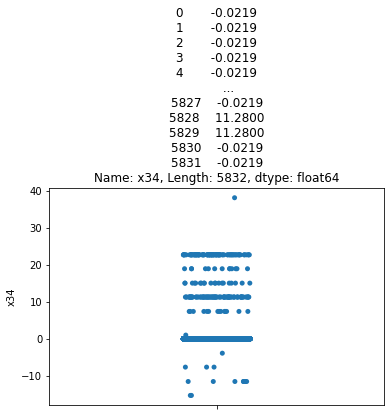

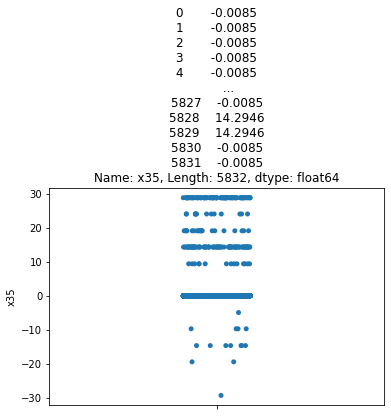

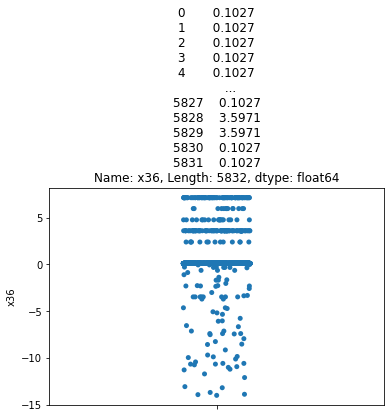

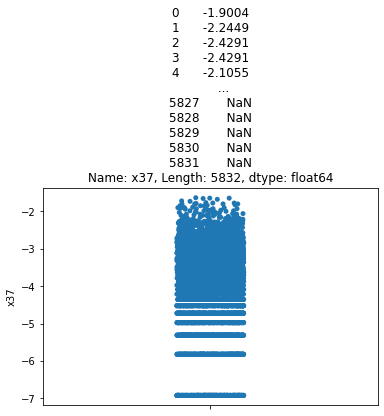

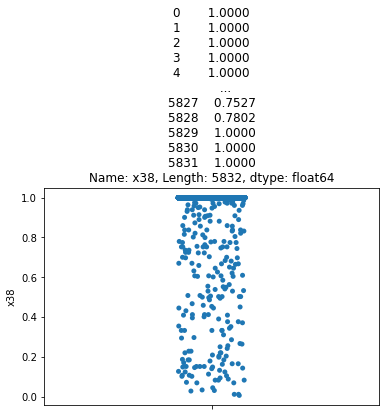

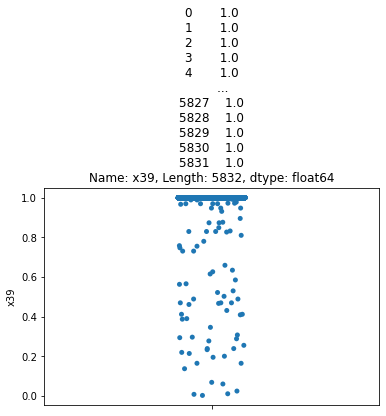

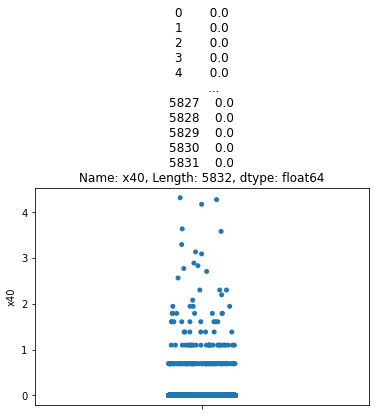

In [14]:
columns = train_df.columns[2:42]

for column in columns:
    sns.stripplot(y=train_df[column])
    plt.title("{}".format(train_df[column]))
    plt.show() 

Os gráficos acima não trazem mais info em relação aos scatters anteriores.

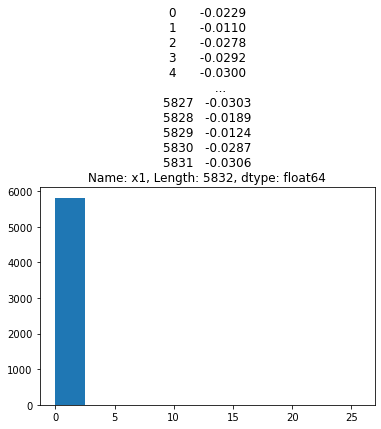

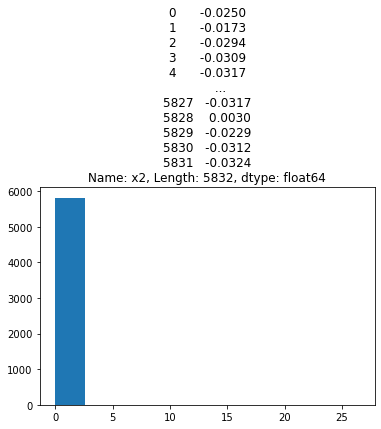

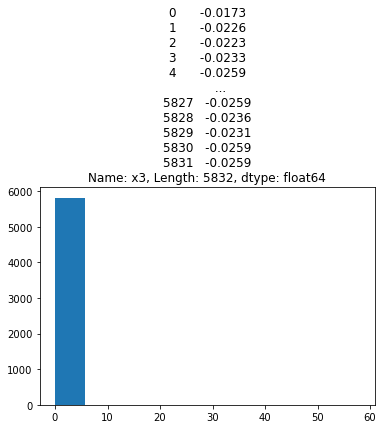

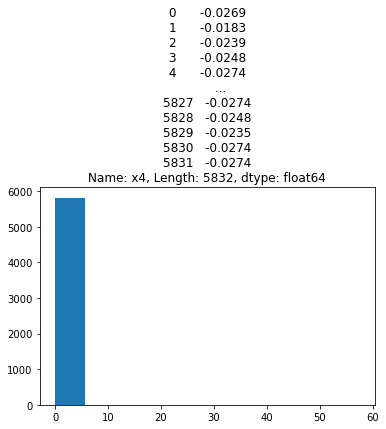

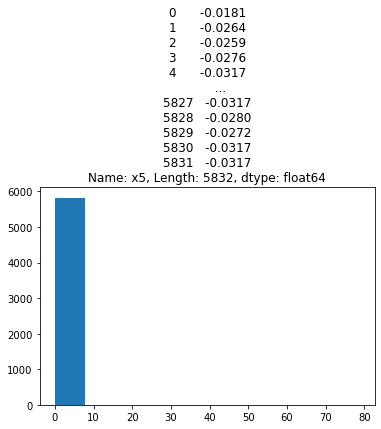

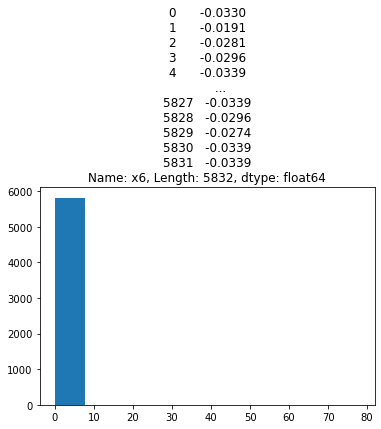

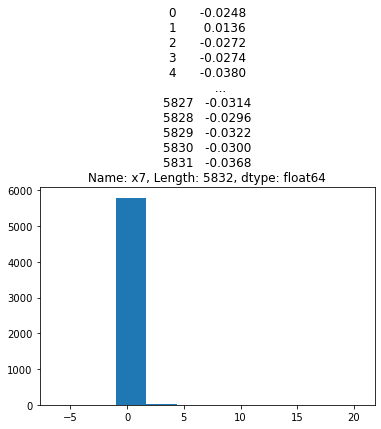

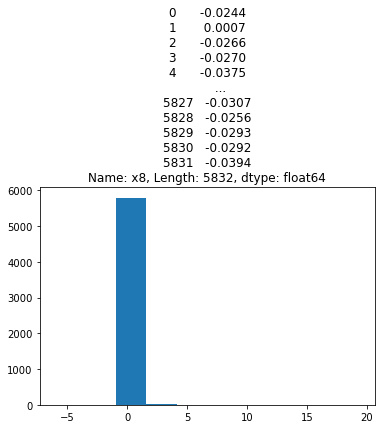

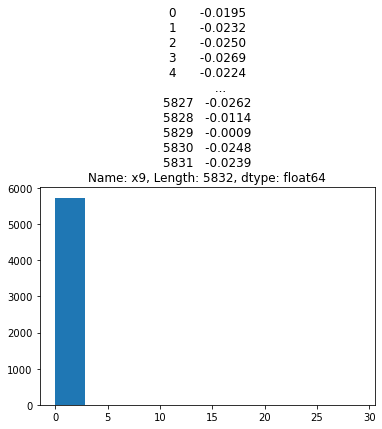

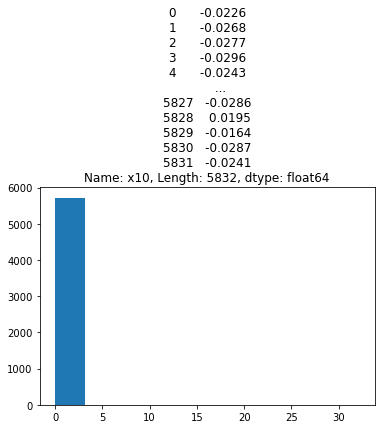

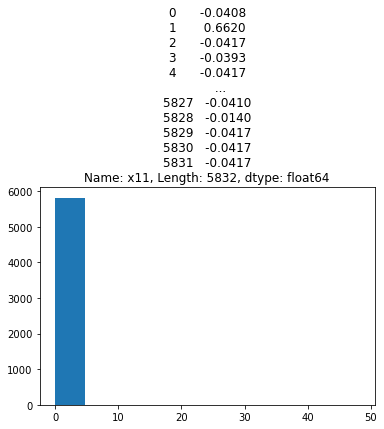

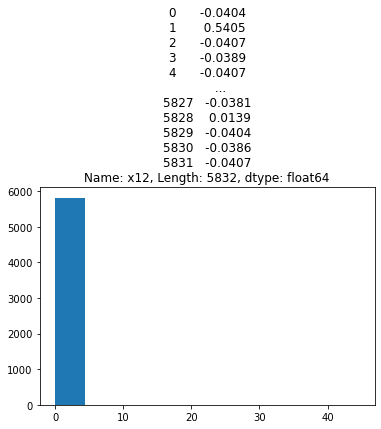

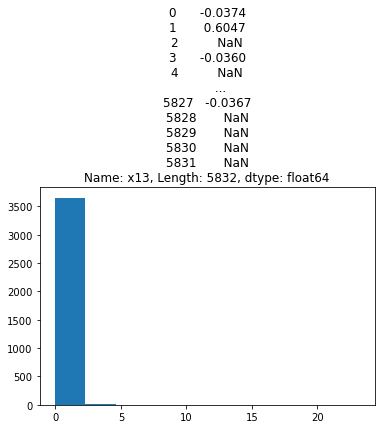

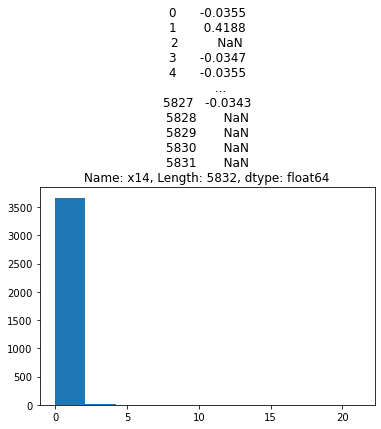

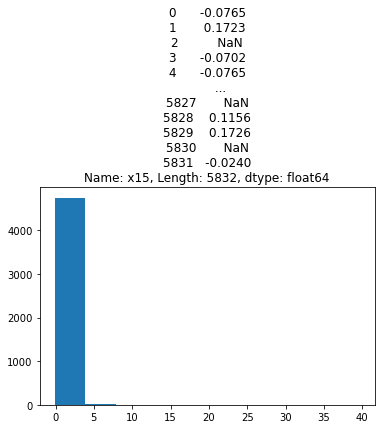

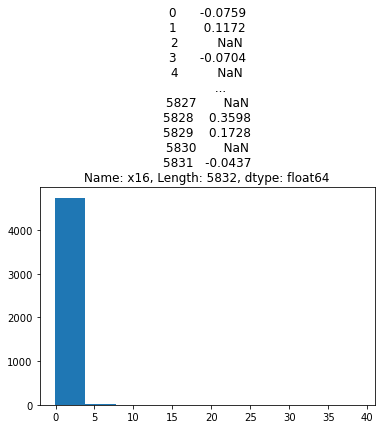

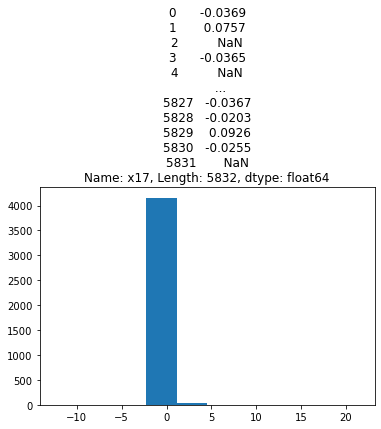

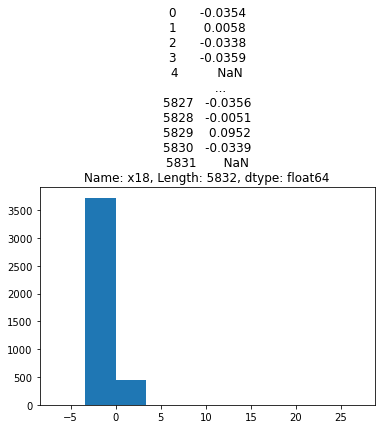

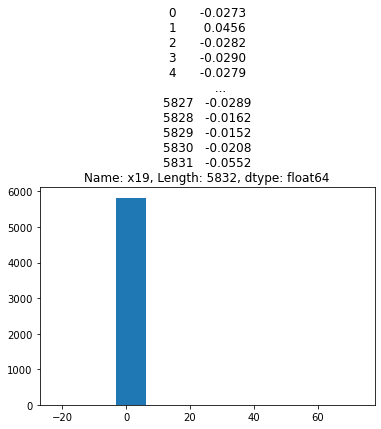

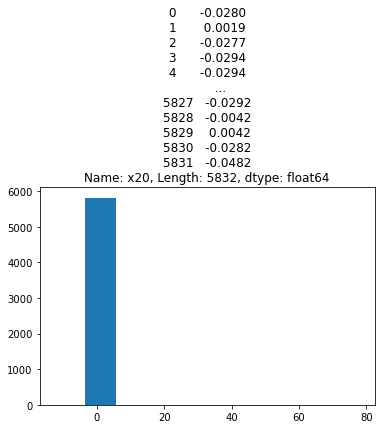

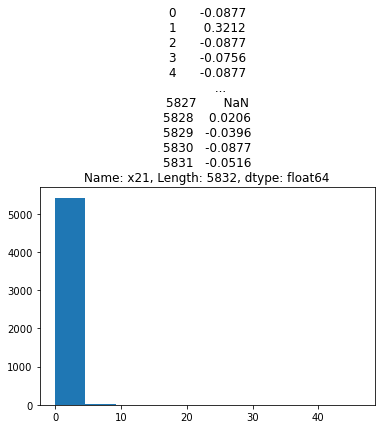

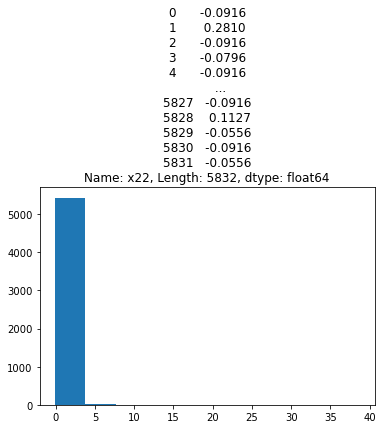

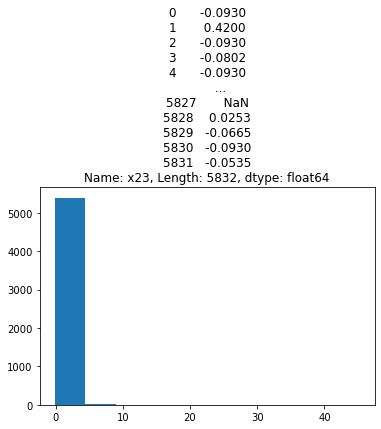

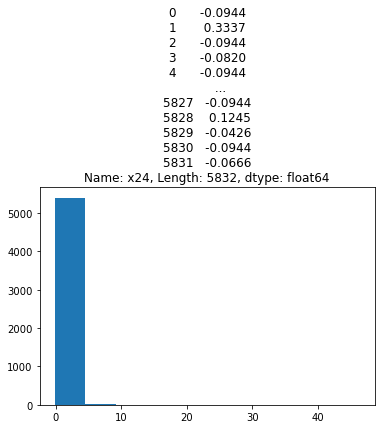

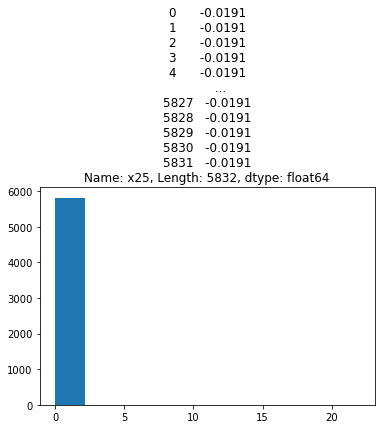

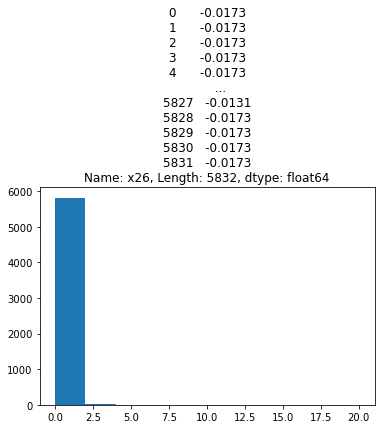

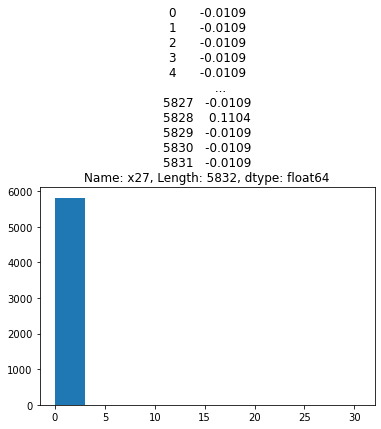

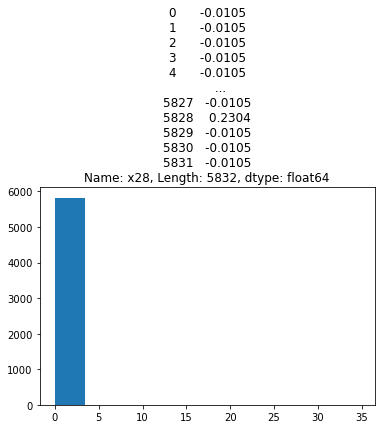

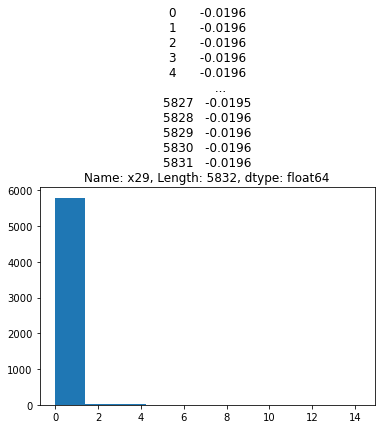

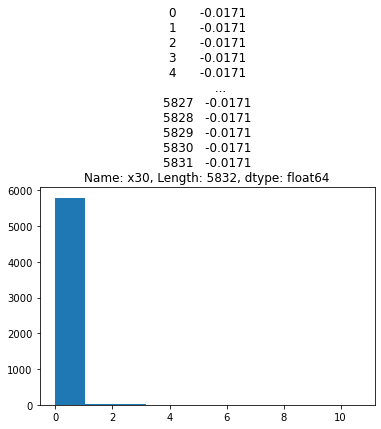

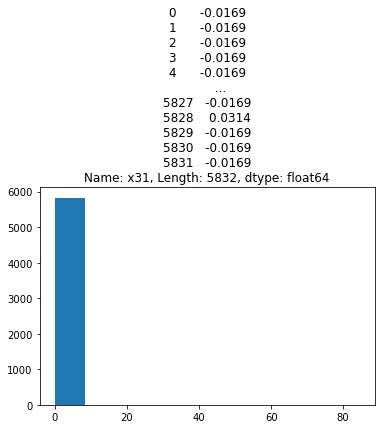

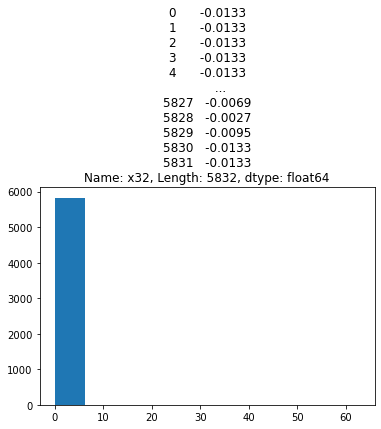

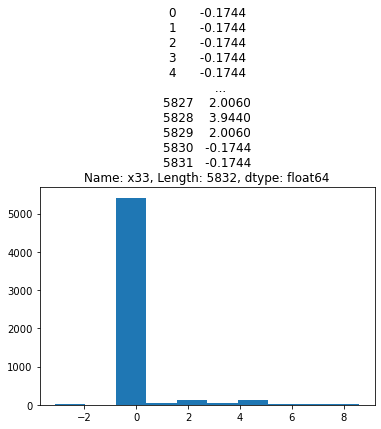

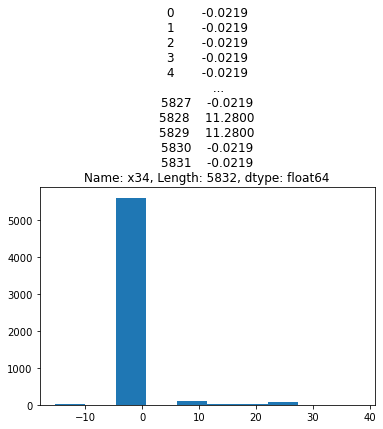

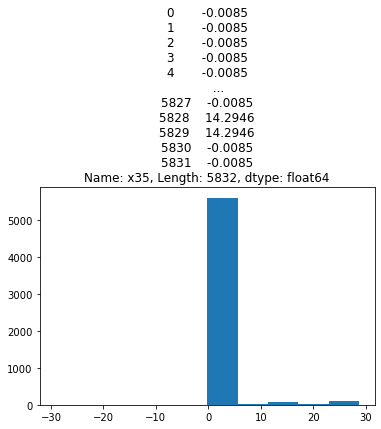

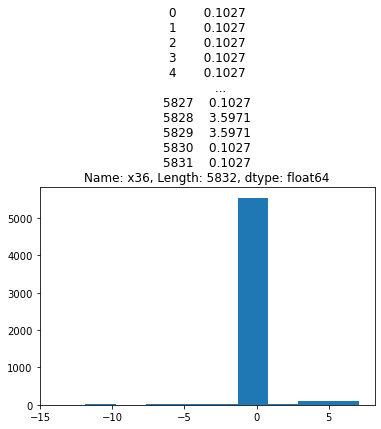

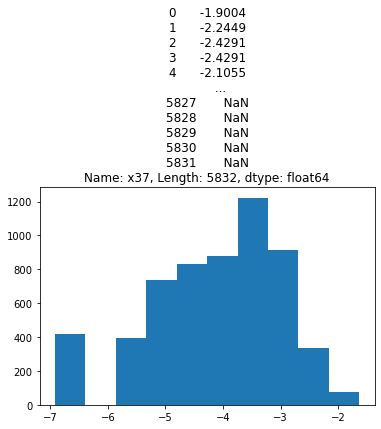

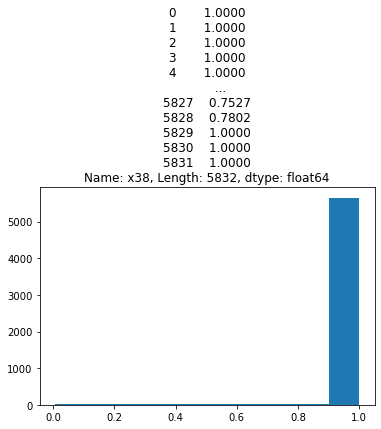

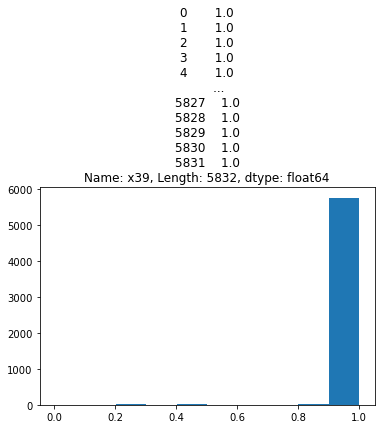

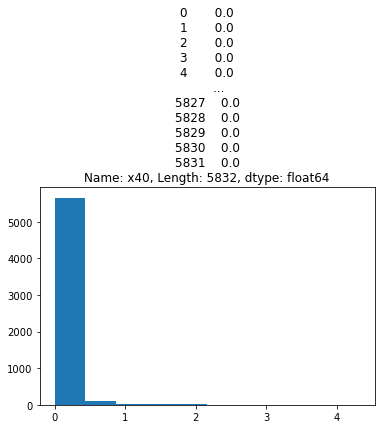

In [15]:
columns = train_df.columns[2:42]

for column in columns:
    plt.hist(train_df[column])
    plt.title("{}".format(train_df[column]))
    plt.show() 

As we would have imagined, histograms for variables with such extension of outliers do not allow us to identify correctly the distribution of those variables. On one hand, we have the majority of the observations sitting around 0; on the other hand we have some outliers very far from the mean, which extends the scale of x axis. The result is what we can see above: histograms with practically just one main bar, where the majority of observation is. The exception would be variable x37 whose distribution is closer to a Normal Distribution (although with some negative skewness). 

# Mann Whitney U - hypothesis testing

In our quest to assess whether there is a "difference" between a company that sends the report on time and the company that does not, we proceed with the Mann-Whitney-Wilcoxon (MWW) test. This is an non-parametric alternative of the Wilcoxon test that is only valid for normal-distribution variables, which we cannot assure for our variables.

The MWW test (also called Mann–Whitney U test) is a nonparametric test of the null hypothesis that, for randomly selected values X and Y from two populations, the probability of X being greater than Y is equal to the probability of Y being greater than X. Or, in a simpler interpretation, the null hypothesis assumes that the distributions of both groups are identical, so that there is a 50% probability that an observation from a value randomly selected from one population exceeds an observation randomly selected from the other population. 

So the Mann-Whitney test compares the distributions of ranks in two groups. To perform the Mann-Whitney test, first all the values are ranked from low to high, paying no attention to which group each value belongs. The smallest number gets a rank of 1. The largest number gets a rank of n, where n is the total number of values in the two groups. Then the ranks are averaged in each group, and if the means of the ranks in the two groups are very different, the P value will be small and will reject the null-hypothesis.

And if we reject H0, we reject the hypothesis that the difference is simply due to random sampling, and we conclude instead that the two populations are in fact distinct. Let us apply this test to our variables.

In [16]:
my_list = []
my_list_2 = []

rslt_df = train_df[train_df['y'] > 0]
rslt_df_2 = train_df[train_df['y'] < 1] 

for i in rslt_df['x1']:
    my_list.append(i)
    
for i in rslt_df_2['x1']:
    my_list_2.append(i)
    
stats.mannwhitneyu(my_list, my_list_2)

MannwhitneyuResult(statistic=3110734.0, pvalue=4.961633265815403e-38)

In [17]:
my_list = []
my_list_2 = []

rslt_df = train_df[train_df['y'] > 0]
rslt_df_2 = train_df[train_df['y'] < 1] 

for i in rslt_df['x2']:
    my_list.append(i)
    
for i in rslt_df_2['x2']:
    my_list_2.append(i)
    
stats.mannwhitneyu(my_list, my_list_2)

MannwhitneyuResult(statistic=3060054.0, pvalue=8.652599831174737e-43)

In [18]:
my_list = []
my_list_2 = []

rslt_df = train_df[train_df['y'] > 0]
rslt_df_2 = train_df[train_df['y'] < 1] 

for i in rslt_df['x1']:
    my_list.append(i)
    
for i in rslt_df_2['x1']:
    my_list_2.append(i)
    
stats.mannwhitneyu(my_list, my_list_2)

MannwhitneyuResult(statistic=3110734.0, pvalue=4.961633265815403e-38)

In [19]:
my_list = []
my_list_2 = []

rslt_df = train_df[train_df['y'] > 0]
rslt_df_2 = train_df[train_df['y'] < 1] 

for i in rslt_df['x38']:
    my_list.append(i)
    
for i in rslt_df_2['x38']:
    my_list_2.append(i)
    
stats.mannwhitneyu(my_list, my_list_2)

MannwhitneyuResult(statistic=3881370.0, pvalue=0.1625329525530248)

We show above the MWW test for only 3 variables for ilustration purposes, even though we have run it for all numerical variables. We can conclude that the 2 samples of companies (those who sent the report on time against those who sent it behind the schedule) were indeed distinct for all variables with exception of x13, x14, x37 and x38.

# Multivariate analysis

Under this section of multivariate analysis we want to analyse the dispersion of the dependant and all numerical variables against each other so that we can have a better perception of possible correlations among them. This is quite a difficult graph to visualize given the high number of variables (remember that we have 40 numerical variables) even if trimmed by four as we did. For a better and quicker understanding of these scatter plots remember that upper right triangle over the diagonal line (that represents the dispersion of y against one of the features) is exactly the same as the lower left triangle below the diagonal line - so we can choose only one to look at the scatter plots.

Despite these difficulties, it is still possible to get some conclusions regarding the correlation of the variables. For example, because the observations follow the line y=x we can assume there is some linear correlation level among the variables x12, x13 and x14. Similar situation happens for the variables x22, x23 and x24. Other example would be comparing x15 or x16 with all the other variables: there are any particular patterns in the scatter plots, with the exception of against each other (x15 and x16 seem in fact to have a correlation).

If you remember well we saw in unique.values list that there were some numerical variables (namely, from x34 to x40) that had much fewer unique observations that the other numerical variables. This is the reason why the scatter plots against each other in the third/last set of graphs is so unusual, and definitely different from those in first 2 set of scatter plots. Because there are so few of observations (in a universe of more than 5800 observations for each variable) that the scatter plots seem so rigid, straigt and confusing. It is possibly the only conclusion we can think of those graphs.

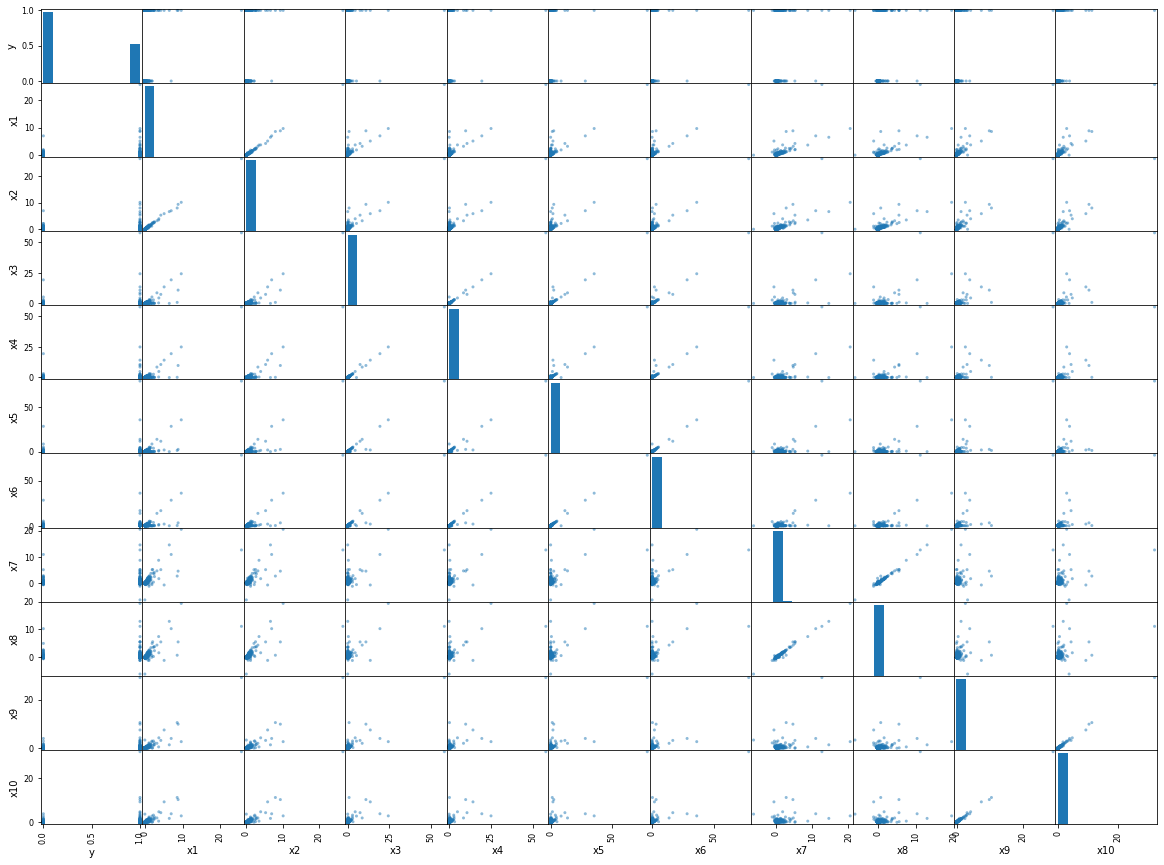

In [20]:
from pandas.plotting import scatter_matrix

matrix = scatter_matrix(train_df[['y','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10']],figsize=(20,15))
plt.show()

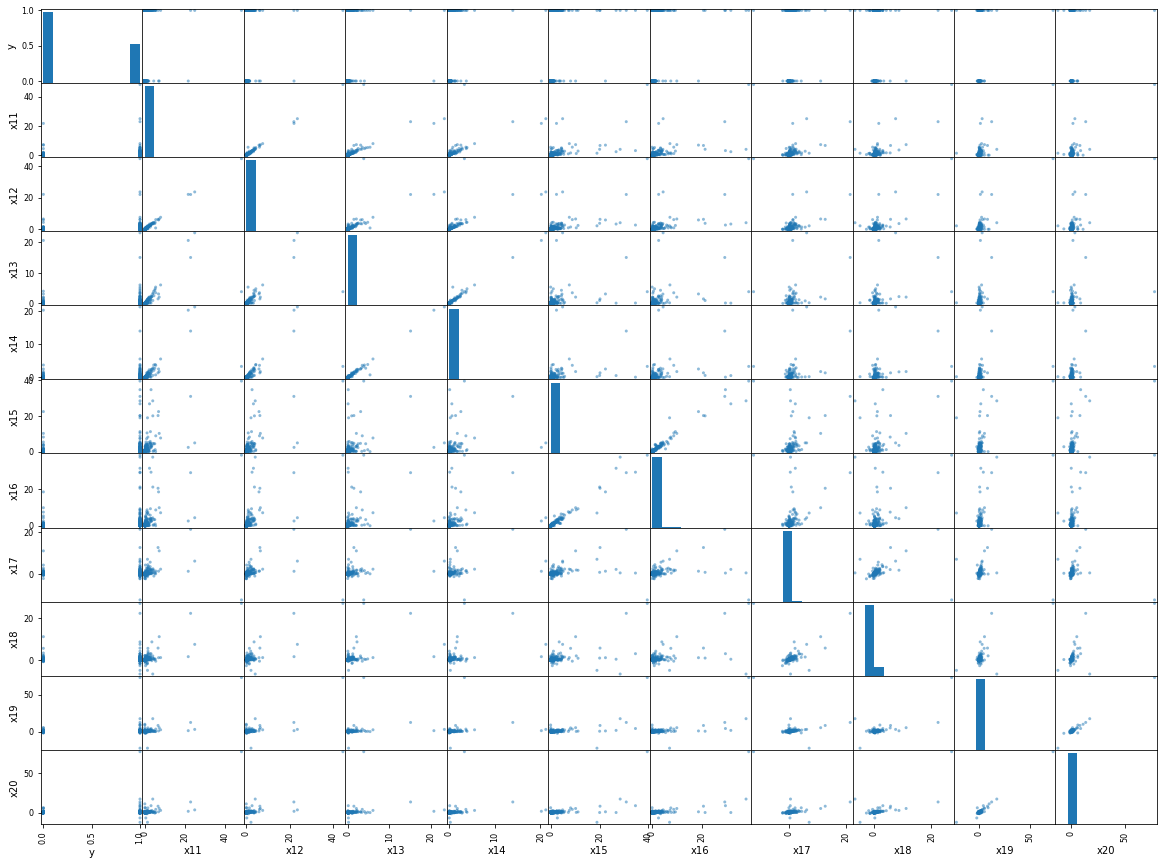

In [21]:
from pandas.plotting import scatter_matrix

matrix = scatter_matrix(train_df[['y','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20']],figsize=(20,15))
plt.show()

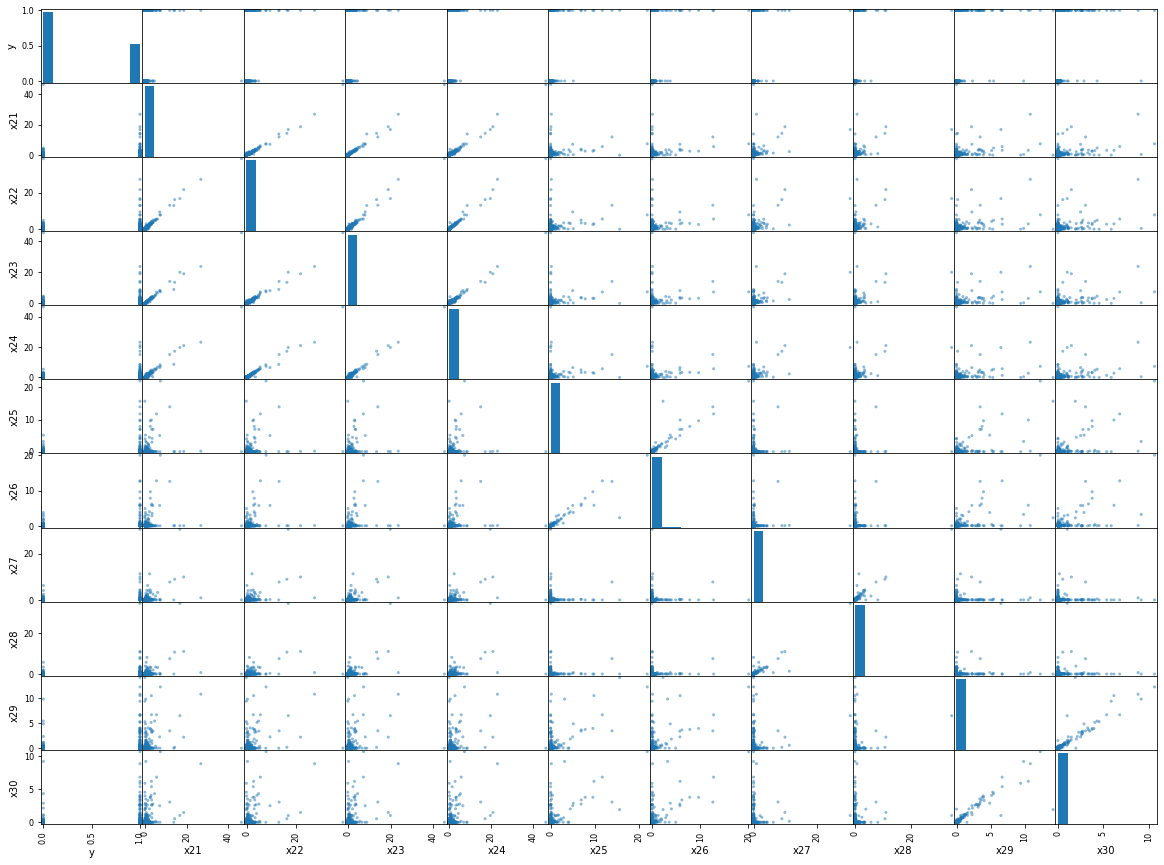

In [22]:
matrix = scatter_matrix(train_df[['y','x21','x22','x23','x24','x25','x26','x27','x28','x29','x30']],figsize=(20,15))
plt.show()

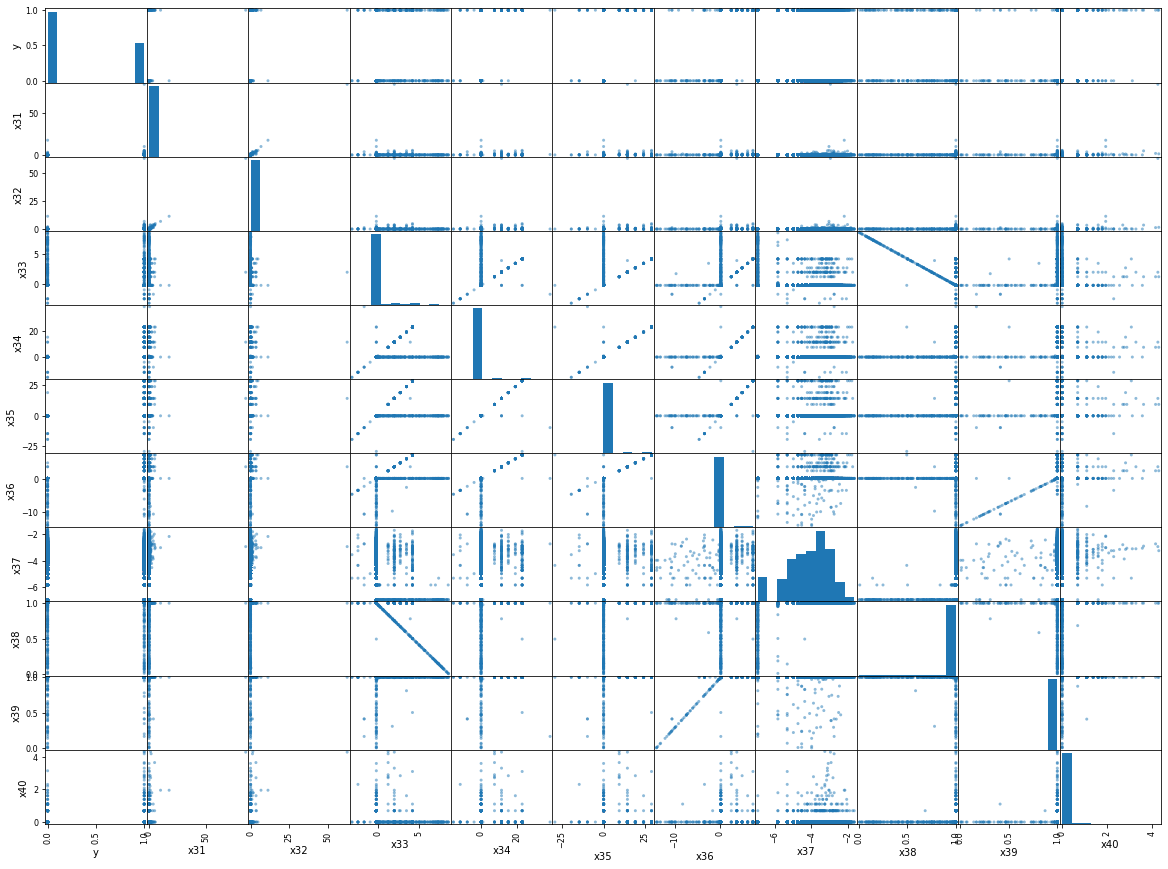

In [23]:
matrix = scatter_matrix(train_df[['y','x31','x32','x33','x34','x35','x36','x37','x38','x39','x40']],figsize=(20,15))
plt.show()

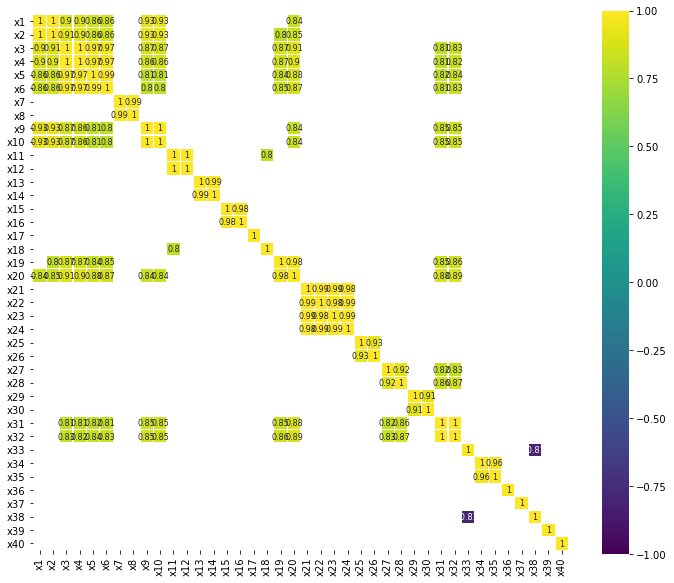

In [24]:
corr = train_df.drop(['y','i', "c1","c2","c3","c4","c5","c6","c7","c8","c9","c10","c11","c12","o1","o2"], axis=1).corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.8) | (corr <= -0.8)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);


This heatmap presents the correlation values higher than 0.8, in absolute terms. This leave us with the numerical variables that are highly correlated. And there are some of them with high correlation in fact: see for example the first 6 variables against each other, them against x10 and x11, and them against x19 and x20, for example, with numbers very close to 1. The same happens among the variables x21 to x24. 

This information is very important because it allows us to understand what features are somewhat redundant and can be removed to reduce the noise around our database.

In [25]:
#identifying the pairs of variables/features as seen above in the graph
def mosthighlycorrelated(df, numtoreport):
    # find the correlations
    cormatrix = df.drop(["c1","c2","c3","c4","c5","c6","c7","c8","c9","c10","c11","c12","o1","o2"], axis = 1).corr()
    # set the correlations on the diagonal or lower triangle to zero,
    # so they will not be reported as the highest ones:
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    # find the top n correlations
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    # assign human-friendly names
    cormatrix.columns = ["First variable", "Second variable", "Correlation"]
    
    return cormatrix.head(numtoreport)

mosthighlycorrelated(train_df, 20)

First variable Second variable  Correlation
0              x1              x2     0.997602
1              x9             x10     0.997186
2              x3              x4     0.995518
3             x11             x12     0.995239
4             x31             x32     0.995195
5              x5              x6     0.994019
6             x21             x23     0.992273
7              x7              x8     0.992160
8             x23             x24     0.990523
9             x13             x14     0.990279
10            x21             x22     0.987557
11            x22             x24     0.985675
12            x21             x24     0.984898
13            x22             x23     0.983127
14            x15             x16     0.976607
15            x19             x20     0.976496
16             x4              x6     0.973502
17             x3              x5     0.972710
18             x4              x5     0.968422
19             x3              x6     0.967951

Above we have the same information as the heatmap but this list shows more precise numbers of correlation for the 20 pairs most correlated of the database. We can see that all of them have correlation values very close to 1.

In [26]:
#identifying the variables/features with correlations over 0.8 with others
correlated_features = set()
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.8: 
            colname = corr.columns[j] 
            correlated_features.add(colname)


print(correlated_features)
len(correlated_features)

{'x22', 'x33', 'x25', 'x23', 'x6', 'x4', 'x1', 'x9', 'x2', 'x10', 'x20', 'x31', 'x3', 'x19', 'x34', 'x13', 'x7', 'x21', 'x5', 'x29', 'x11', 'x27', 'x28', 'x15'}


24

In order to know what features we can remove given their high correlation, we created the code above that returns that list of dispensable variables. There are 24 variables that are highly correlated (over .8, in absolute terms) with other variables and because of that we can remove them later on.

In [27]:
#and eliminating them from our df
#train_df.drop(labels=correlated_features, axis=1, inplace=True)

# Categorical and Ordinal Variables

In [28]:
#Definition of absolute and relative frequencie for categorical and ordinal variables (except c1, c2, c3)

abs_freq_c1 = train_df['c1'].value_counts()
rel_freq_c1 = train_df['c1'].value_counts(normalize=True)
freq_abs_c1 = pd.DataFrame(abs_freq_c1)
freq_rel_c1 = pd.DataFrame(rel_freq_c1)
freq_rel_c1.rename(columns={'c1': 'Rel_Freq c1'}, inplace=True)

abs_freq_c2 = train_df['c2'].value_counts()
rel_freq_c2 = train_df['c2'].value_counts(normalize=True)
freq_abs_c2 = pd.DataFrame(abs_freq_c2)
freq_rel_c2 = pd.DataFrame(rel_freq_c2)
freq_rel_c2.rename(columns={'c2': 'Rel_Freq c2'}, inplace=True)


abs_freq_c3 = train_df['c3'].value_counts()
rel_freq_c3 = train_df['c3'].value_counts(normalize=True)
freq_abs_c3 = pd.DataFrame(abs_freq_c3)
freq_rel_c3 = pd.DataFrame(rel_freq_c3)
freq_rel_c3.rename(columns={'c3': 'Rel_Freq c3'}, inplace=True)

abs_freq_c4 = train_df['c4'].value_counts()
rel_freq_c4 = train_df['c4'].value_counts(normalize=True)
freq_abs_c4 = pd.DataFrame(abs_freq_c4)
freq_rel_c4 = pd.DataFrame(rel_freq_c4)
freq_rel_c4.rename(columns={'c4': 'Rel_Freq c4'}, inplace=True)

abs_freq_c5 = train_df['c5'].value_counts()
rel_freq_c5 = train_df['c5'].value_counts(normalize=True)
freq_abs_c5 = pd.DataFrame(abs_freq_c5)
freq_rel_c5 = pd.DataFrame(rel_freq_c5)
freq_rel_c5.rename(columns={'c5': 'Rel_Freq c5'}, inplace=True)

abs_freq_c6 = train_df['c6'].value_counts()
rel_freq_c6 = train_df['c6'].value_counts(normalize=True)
freq_abs_c6 = pd.DataFrame(abs_freq_c6)
freq_rel_c6 = pd.DataFrame(rel_freq_c6)
freq_rel_c6.rename(columns={'c6': 'Rel_Freq c6'}, inplace=True)

abs_freq_c7 = train_df['c7'].value_counts()
rel_freq_c7 = train_df['c7'].value_counts(normalize=True)
freq_abs_c7 = pd.DataFrame(abs_freq_c7)
freq_rel_c7 = pd.DataFrame(rel_freq_c7)
freq_rel_c7.rename(columns={'c7': 'Rel_Freq c7'}, inplace=True)

abs_freq_c8 = train_df['c8'].value_counts()
rel_freq_c8 = train_df['c8'].value_counts(normalize=True)
freq_abs_c8 = pd.DataFrame(abs_freq_c8)
freq_rel_c8 = pd.DataFrame(rel_freq_c8)
freq_rel_c8.rename(columns={'c8': 'Rel_Freq c8'}, inplace=True)

abs_freq_c9 = train_df['c9'].value_counts()
rel_freq_c9 = train_df['c9'].value_counts(normalize=True)
freq_abs_c9 = pd.DataFrame(abs_freq_c9)
freq_rel_c9 = pd.DataFrame(rel_freq_c9)
freq_rel_c9.rename(columns={'c9': 'Rel_Freq c9'}, inplace=True)

abs_freq_c10 = train_df['c10'].value_counts()
rel_freq_c10 = train_df['c10'].value_counts(normalize=True)
freq_abs_c10 = pd.DataFrame(abs_freq_c10)
freq_rel_c10 = pd.DataFrame(rel_freq_c10)
freq_rel_c10.rename(columns={'c10': 'Rel_Freq c10'}, inplace=True)

abs_freq_c11 = train_df['c11'].value_counts()
rel_freq_c11 = train_df['c11'].value_counts(normalize=True)
freq_abs_c11 = pd.DataFrame(abs_freq_c11)
freq_rel_c11 = pd.DataFrame(rel_freq_c11)
freq_rel_c11.rename(columns={'c11': 'Rel_Freq c11'}, inplace=True)

abs_freq_c12 = train_df['c12'].value_counts()
rel_freq_c12 = train_df['c12'].value_counts(normalize=True)
freq_abs_c12 = pd.DataFrame(abs_freq_c12)
freq_rel_c12 = pd.DataFrame(rel_freq_c12)
freq_rel_c12.rename(columns={'c12': 'Rel_Freq c12'}, inplace=True)

abs_freq_o1 = train_df['o1'].value_counts()
rel_freq_o1 = train_df['o1'].value_counts(normalize=True)
freq_abs_o1 = pd.DataFrame(abs_freq_o1)
freq_rel_o1 = pd.DataFrame(rel_freq_o1)
freq_rel_o1.rename(columns={'o1': 'Rel_Freq o1'}, inplace=True)

abs_freq_o2 = train_df['o2'].value_counts()
rel_freq_o2 = train_df['o2'].value_counts(normalize=True)
freq_abs_o2 = pd.DataFrame(abs_freq_o2)
freq_rel_o2 = pd.DataFrame(rel_freq_o2)
freq_rel_o2.rename(columns={'o2': 'Rel_Freq o2'}, inplace=True)

      c1  Rel_Freq c1
111    3     0.000514
112    1     0.000171
113   24     0.004115
119   12     0.002058
121   13     0.002229
...   ..          ...
9601  17     0.002915
9602  59     0.010117
9603  19     0.003258
9604   7     0.001200
9609   4     0.000686

[418 rows x 2 columns]


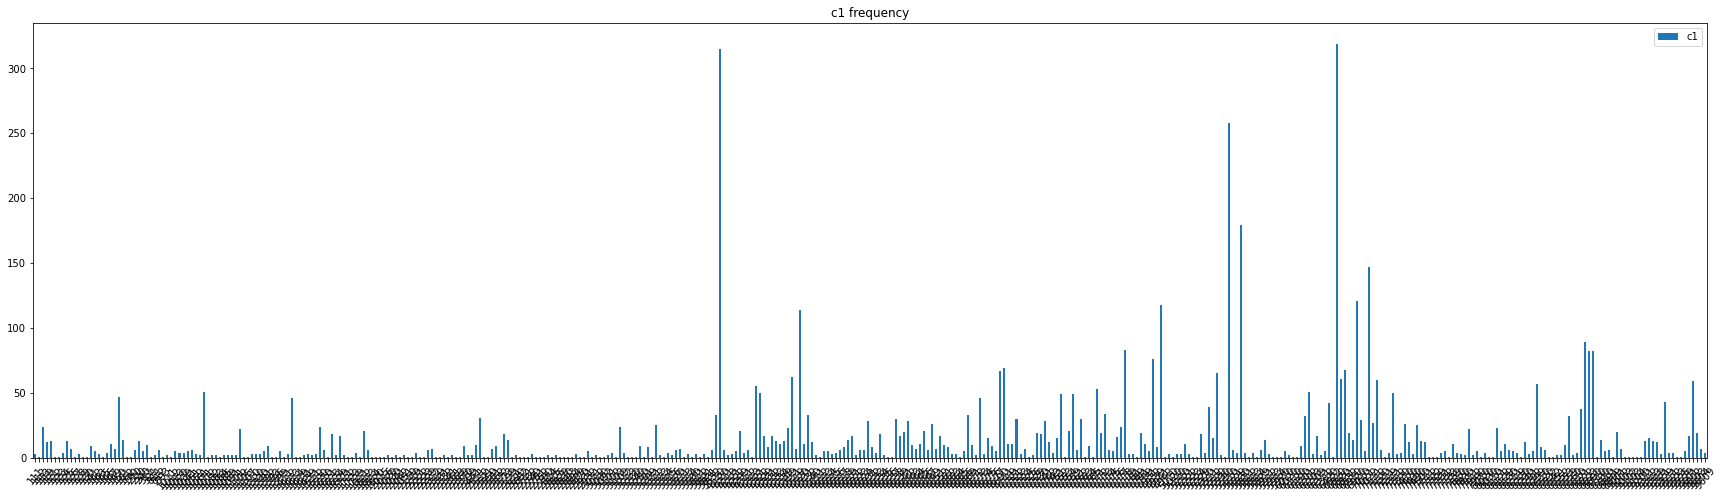

In [29]:
#Creating frequency table for c1

df_c1 = pd.concat([freq_abs_c1, freq_rel_c1],axis=1)
df_c1.sort_index(inplace=True)
print(df_c1)

#Bar Chart
freq_abs_c1.sort_index(inplace=True)
freq_abs_c1.plot.bar(rot=50, title="c1 frequency", figsize=(30,8))
plt.show(block=True)

      c2  Rel_Freq c2
11    40     0.006859
12    44     0.007545
13     1     0.000171
14    40     0.006859
15    47     0.008059
..   ...          ...
931   53     0.009088
932   46     0.007888
951    4     0.000686
952   11     0.001886
960  106     0.018176

[202 rows x 2 columns]


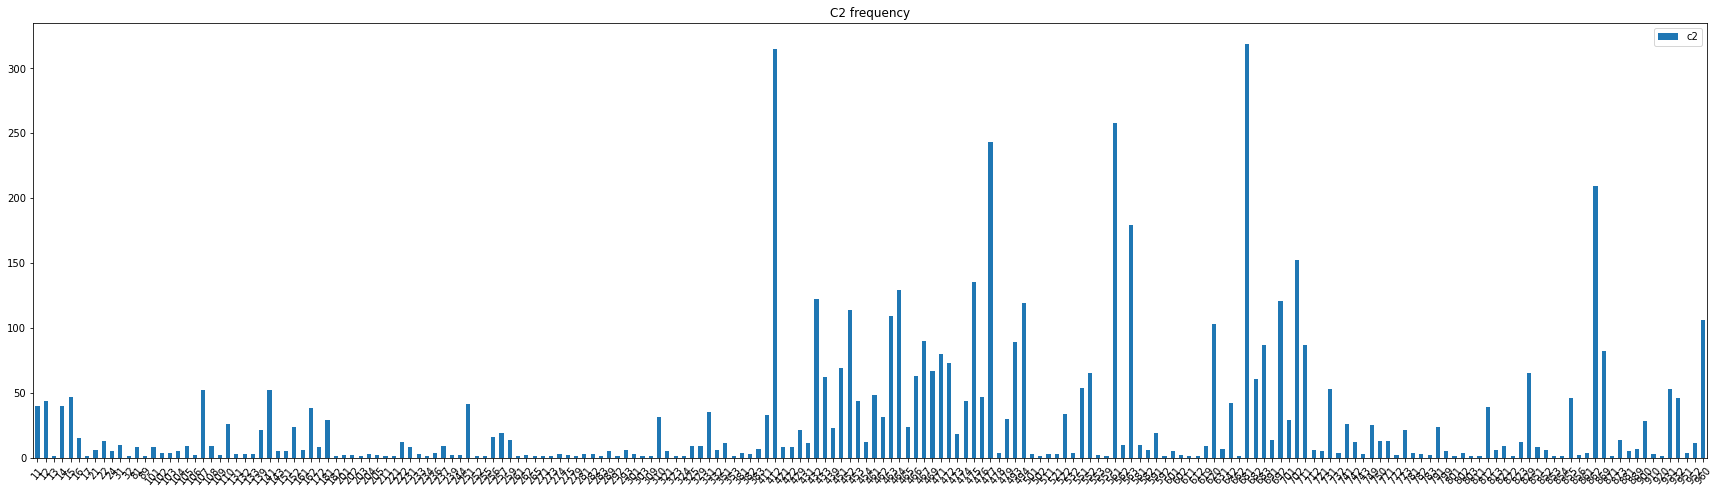

In [30]:
#Creating frequency table for c2

df_c2 = pd.concat([freq_abs_c2, freq_rel_c2],axis=1)
df_c2.sort_index(inplace=True)
print(df_c2)

#Bar Chart
freq_abs_c2.sort_index(inplace=True)
freq_abs_c2.plot.bar(rot=50, title="C2 frequency", figsize=(30,8))
plt.show(block=True)

     c3  Rel_Freq c3
1   188     0.032236
2    24     0.004115
3    11     0.001886
8     9     0.001543
10   95     0.016289
..  ...          ...
91    3     0.000514
92    1     0.000171
93   99     0.016975
95   15     0.002572
96  106     0.018176

[73 rows x 2 columns]


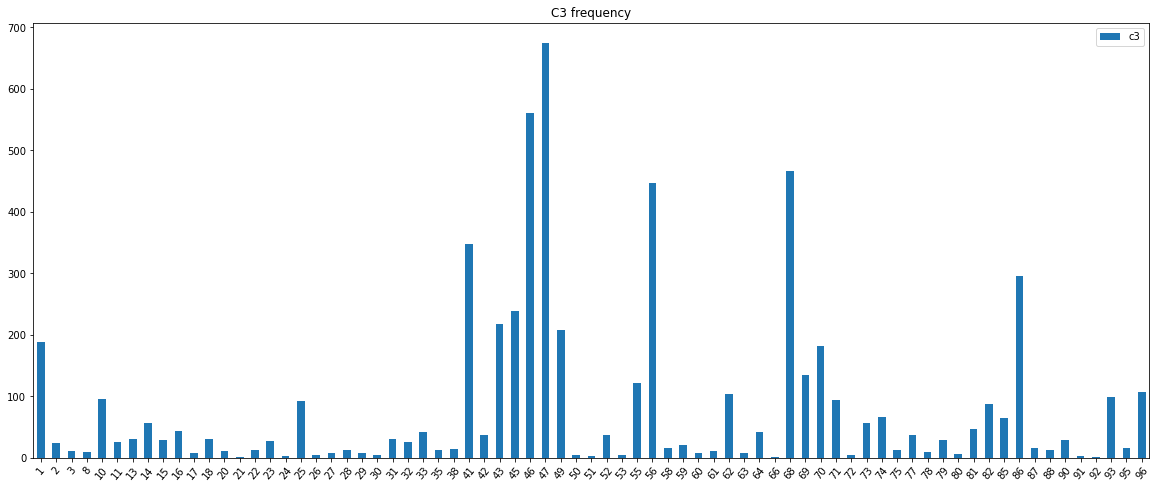

In [31]:
#Creating frequency table for c3

df_c3 = pd.concat([freq_abs_c3, freq_rel_c3],axis=1)
df_c3.sort_index(inplace=True)
print(df_c3)

#Bar Chart
freq_abs_c3.sort_index(inplace=True)
freq_abs_c3.plot.bar(rot=50, title="C3 frequency", figsize=(20,8))
plt.show(block=True)

###### c1, c2 and c3 have a big amount of unique values, being c1 more specific than c2 and c3 and by consequente the category value with more number of unique values. This could indicate that c1 can be a subcategory of c2 and c2 a subcategory of c3 , just like an economic sector classification

      c4  Rel_Freq c4
20  5311     0.910665
26     1     0.000171
28   230     0.039438
30   290     0.049726


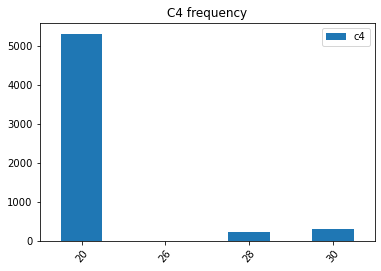

In [32]:
#Creating frequency table for c4

df_c4 = pd.concat([freq_abs_c4, freq_rel_c4],axis=1)
df_c4.sort_index(inplace=True)
print(df_c4)

#Bar Chart
freq_abs_c4.sort_index(inplace=True)
freq_abs_c4.plot.bar(rot=50, title="C4 frequency")
plt.show(block=True)


      c5  Rel_Freq c5
22  5766     0.988683
24    65     0.011145
26     1     0.000171


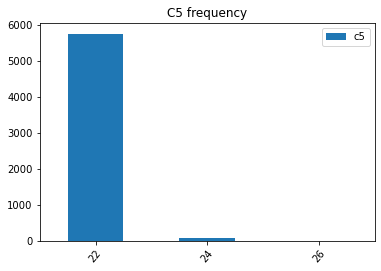

In [33]:

#Creating frequency table for c5

df_c5 = pd.concat([freq_abs_c5, freq_rel_c5],axis=1)
print(df_c5)

#Bar Chart
freq_abs_c5.plot.bar(rot=50, title="C5 frequency")
plt.show(block=True)


     c6  Rel_Freq c6
2  5758     0.987311
3    74     0.012689


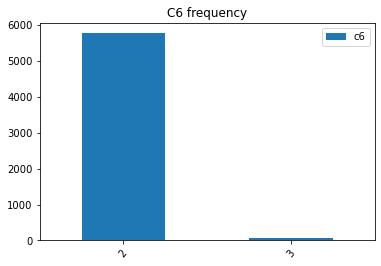

In [34]:
#Creating frequency table for c6

df_c6 = pd.concat([freq_abs_c6, freq_rel_c6],axis=1)
print(df_c6)

#Bar Chart
freq_abs_c6.plot.bar(rot=50, title="C6 frequency")
plt.show(block=True)


     c7  Rel_Freq c7
2    32     0.005487
4   687     0.117798
6   884     0.151578
8  4229     0.725137


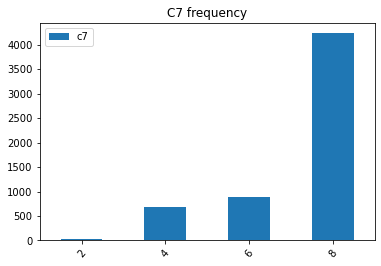

In [35]:
#Creating frequency table for c7

df_c7 = pd.concat([freq_abs_c7, freq_rel_c7],axis=1)
df_c7.sort_index(inplace=True)
print(df_c7)

#Bar Chart
freq_abs_c7.sort_index(inplace=True)
freq_abs_c7.plot.bar(rot=50, title="C7 frequency")
plt.show(block=True)


     c8  Rel_Freq c8
0  5829     0.999486
1     3     0.000514


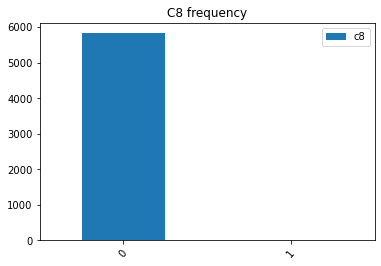

In [36]:

#Creating frequency table for c8

df_c8 = pd.concat([freq_abs_c8, freq_rel_c8],axis=1)
print(df_c8)

#Bar Chart
freq_abs_c8.plot.bar(rot=50, title="C8 frequency")
plt.show(block=True)


      c9  Rel_Freq c9
20  5479     0.939472
24    76     0.013032
26     5     0.000857
28   230     0.039438
30    42     0.007202


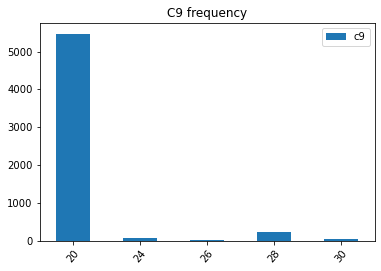

In [37]:

df_c9 = pd.concat([freq_abs_c9, freq_rel_c9],axis=1)
df_c9.sort_index(inplace=True)
print(df_c9)

#Bar Chart
freq_abs_c9.sort_index(inplace=True)
freq_abs_c9.plot.bar(rot=50, title="C9 frequency")
plt.show(block=True)

     c10  Rel_Freq c10
22  5672      0.972565
24   106      0.018176
26     1      0.000171
28    53      0.009088


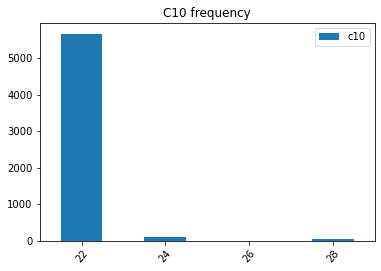

In [38]:
#Creating frequency table for c10
df_c10 = pd.concat([freq_abs_c10, freq_rel_c10],axis=1)
df_c10.sort_index(inplace=True)
print(df_c10)

#Bar Chart
freq_abs_c10.sort_index(inplace=True)
freq_abs_c10.plot.bar(rot=50, title="C10 frequency")
plt.show(block=True)


    c11  Rel_Freq c11
1     2      0.000343
2  5715      0.979938
3    97      0.016632
4    18      0.003086


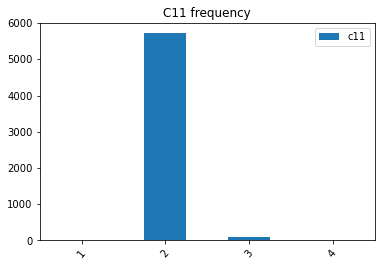

In [39]:

#Creating frequency table for c11

df_c11 = pd.concat([freq_abs_c11, freq_rel_c11],axis=1)
df_c11.sort_index(inplace=True)
print(df_c11)

#Bar Chart
freq_abs_c11.sort_index(inplace=True)
freq_abs_c11.plot.bar(rot=50, title="C11 frequency")
plt.show(block=True)

    c12  Rel_Freq c12
2    36      0.006173
4   660      0.113169
6   858      0.147119
8  4278      0.733539


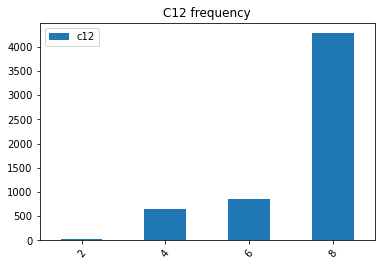

In [40]:
#Creating frequency table for c12

df_c12 = pd.concat([freq_abs_c12, freq_rel_c12],axis=1)
df_c12.sort_index(inplace=True)
print(df_c12)

#Bar Chart
freq_abs_c12.sort_index(inplace=True)
freq_abs_c12.plot.bar(rot=50, title="C12 frequency")
plt.show(block=True)

      o1  Rel_Freq o1  Cumulative_Sum  Cumulative_perc (%)
22  4968     0.851852            4968            85.185185
24   666     0.114198            5634            96.604938
26   160     0.027435            5794            99.348422
28    38     0.006516            5832           100.000000


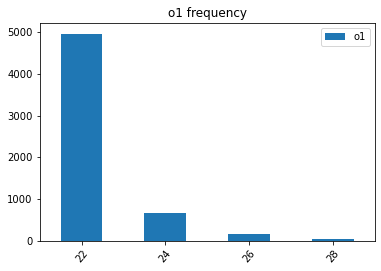

In [41]:
#Creating frequency table for o1

df_o1 = pd.concat([freq_abs_o1, freq_rel_o1],axis=1)
df_o1.sort_index(inplace=True)
df_o1['Cumulative_Sum'] = df_o1['o1'].cumsum()
df_o1['Cumulative_perc (%)'] = 100*df_o1['Cumulative_Sum']/df_o1['o1'].sum()
print(df_o1)


#Bar Chart

freq_abs_o1.plot.bar(rot=50, title="o1 frequency")
plt.show(block=True)

     o2  Rel_Freq o2  Cumulative_Sum  Cumulative_perc (%)
6   298     0.051097             298             5.109739
7   255     0.043724             553             9.482167
8   331     0.056756             884            15.157750
9   353     0.060528            1237            21.210562
10  323     0.055384            1560            26.748971
11  345     0.059156            1905            32.664609
12  316     0.054184            2221            38.082990
13  361     0.061900            2582            44.272977
14  407     0.069787            2989            51.251715
15  497     0.085219            3486            59.773663
16  678     0.116255            4164            71.399177
17   71     0.012174            4235            72.616598
18   46     0.007888            4281            73.405350
19  843     0.144547            5124            87.860082
20  637     0.109225            5761            98.782579
23    4     0.000686            5765            98.851166
24    2     0.

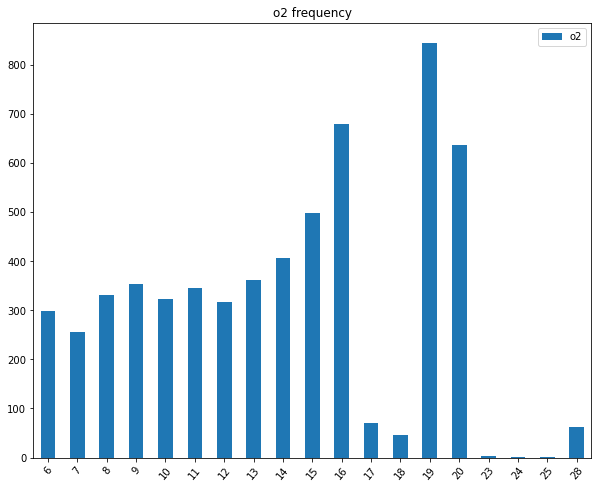

In [42]:
#Creating frequency table for o2

df_o2 = pd.concat([freq_abs_o2, freq_rel_o2],axis=1)
df_o2.sort_index(inplace=True)
df_o2['Cumulative_Sum'] = df_o2['o2'].cumsum()
df_o2['Cumulative_perc (%)'] = 100*df_o2['Cumulative_Sum']/df_o2['o2'].sum()
print(df_o2)

#Bar Chart
freq_abs_o2.sort_index(inplace=True)
freq_abs_o2.plot.bar(rot=50, title="o2 frequency", figsize=(10,8))
plt.show(block=True)

The past graphs represent the frequency tables for each categorical and ordinal variables. As we have seen before, the first catorical variables have multiple unique values which enlarge the x axis and the frequency table. 

During this analysis we became aware that c1, c2 and c3 are associated in the sense that c3 represents the first 2 digits of c1, and c2 represents the first 3 digits of c1. We believe this might indicate some kind of Economic Activity Code (EAC) where c1 is a disaggregated code (4 digits) of c2 and c3.

# Contengency tables for categorical/ordinal and target variable

Contingency tables (also called crosstabs or two-way tables) are used in statistics to summarize the relationship between several categorical variables. A contingency table is a special type of frequency distribution table, where two variables are shown simultaneously. In our case we are going to see the frequency distribution between each of the categorical variables against our dependant variable y, under the same reasoning we had when we ran the Mann-Whitney-Wilcoxon test for numerical variables (to assess whether there is a difference between companies that send the report on time or not throughout their categorical variables).

As we have seen it before, c3 has multiple unique values which turns the contingency table long and its graph somewhat "noisy".

c3   1   2   3   8   10  11  13  14  15  16  17  18  20  21  22  23  24  25  \
y                                                                             
0   119  19   7   7  50  17  22  42  22  29   6  21   4   0   8  21   1  66   
1    69   5   4   2  45   9   8  15   7  15   2   9   6   1   5   6   1  26   

c3  26  27  28  29  30  31  32  33  35  38   41  42   43   45   46   47   49  \
y                                                                              
0    2   3   5   0   1  20  18  25   9  10  213  21  151  159  339  478  135   
1    2   5   7   7   4  11   7  16   3   4  135  16   67   80  222  196   73   

c3  50  51  52  53  55   56  58  59  60  61  62  63  64  66   68  69   70  71  \
y                                                                               
0    4   1  20   2  73  300  13  15   4   2  66   2  20   1  307  83  114  61   
1    0   2  17   2  49  147   3   5   3   9  37   5  22   0  160  52   67  32   

c3  72  73  74  75  77  78  79  80  8

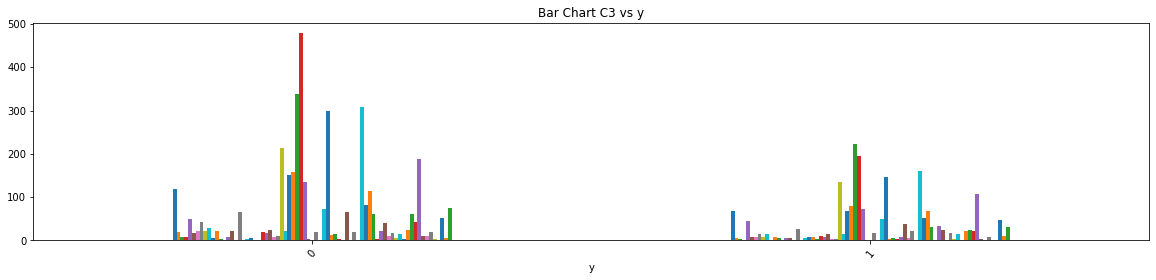

In [43]:
#Contengency Table between target variable y and c3

data_crosstab_c3 = pd.crosstab(train_df['y'],train_df['c3'], margins = False)
print(data_crosstab_c3)

# Draw vertical bar chart for C3

data_crosstab_c3.plot.bar(rot=50, title="Bar Chart C3 vs y", figsize=(20,4), legend=None)
plt.show(block=True)

c4    20  26   28   30
y                     
0   3568   0    6  179
1   1743   1  224  111


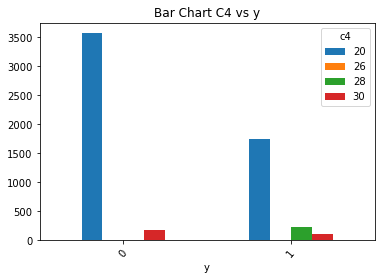

In [44]:
#Contengency Table between target variable y and c4

data_crosstab_c4 = pd.crosstab(train_df['y'],train_df['c4'], margins = False)
print(data_crosstab_c4)

# Draw vertical bar chart for C4

data_crosstab_c4.plot.bar(rot=50, title="Bar Chart C4 vs y")
plt.show(block=True)

c5    22  24  26
y               
0   3701  51   1
1   2065  14   0


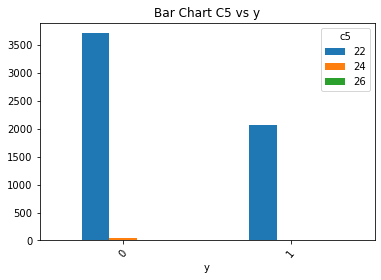

In [45]:

#Contengency Table between target variable y and c5

data_crosstab_c5 = pd.crosstab(train_df['y'],train_df['c5'], margins = False)
print(data_crosstab_c5)

#Bar Chart

data_crosstab_c5.plot.bar(rot=50, title="Bar Chart C5 vs y")
plt.show(block=True)

c6     2   3
y           
0   3691  62
1   2067  12


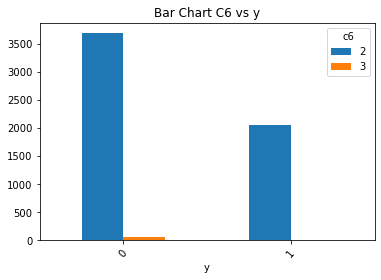

In [46]:
#Contengency Table between target variable y and c6

data_crosstab_c6 = pd.crosstab(train_df['y'],train_df['c6'], margins = False)
print(data_crosstab_c6)

#Bar Chart

data_crosstab_c6.plot.bar(rot=50, title="Bar Chart C6 vs y")
plt.show(block=True)

c7   2    4    6     8
y                     
0    9  305  531  2908
1   23  382  353  1321


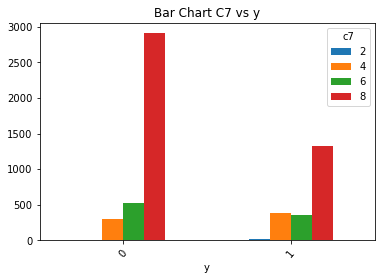

In [47]:

#Contengency Table between target variable y and c7

data_crosstab_c7 = pd.crosstab(train_df['y'],train_df['c7'], margins = False)
print(data_crosstab_c7)

#Bar Chart

data_crosstab_c7.plot.bar(rot=50, title="Bar Chart C7 vs y")
plt.show(block=True)


c8     0  1
y          
0   3750  3
1   2079  0


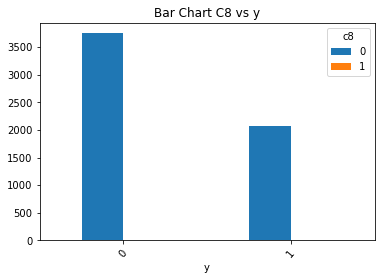

In [48]:
#Contengency Table between target variable y and c8

data_crosstab_c8 = pd.crosstab(train_df['y'],train_df['c8'], margins = False)
print(data_crosstab_c8)

#Bar Chart

data_crosstab_c8.plot.bar(rot=50, title="Bar Chart C8 vs y")
plt.show(block=True)


c9    20  24  26   28  30
y                        
0   3649  68   1    8  27
1   1830   8   4  222  15


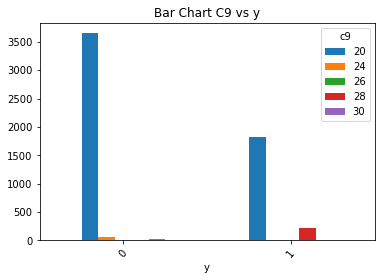

In [49]:
#Contengency Table between target variable y and c9

data_crosstab_c9 = pd.crosstab(train_df['y'],train_df['c9'], margins = False)
print(data_crosstab_c9)

#Bar Chart

data_crosstab_c9.plot.bar(rot=50, title="Bar Chart C9 vs y")
plt.show(block=True)

c10    22  24  26  28
y                    
0    3621  83   0  49
1    2051  23   1   4


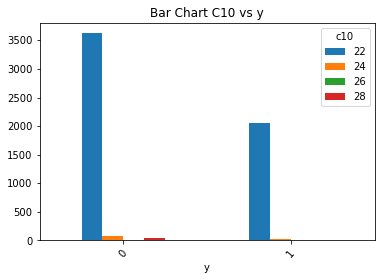

In [50]:
#Contengency Table between target variable y and c10

data_crosstab_c10 = pd.crosstab(train_df['y'],train_df['c10'], margins = False)
print(data_crosstab_c10)

#Bar Chart

data_crosstab_c10.plot.bar(rot=50, title="Bar Chart C10 vs y")
plt.show(block=True)

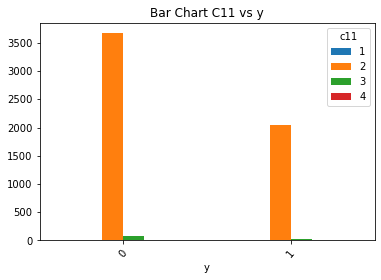

In [51]:
#Contengency Table between target variable y and c11

data_crosstab_c11 = pd.crosstab(train_df['y'],train_df['c11'], margins = False)
data_crosstab_c11

#Bar Chart

data_crosstab_c11.plot.bar(rot=50, title="Bar Chart C11 vs y")
plt.show(block=True)

c12   2    4    6     8
y                      
0    10  282  503  2958
1    26  378  355  1320


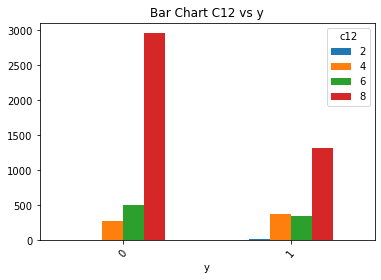

In [52]:
#Contengency Table between target variable y and c12

data_crosstab_c12 = pd.crosstab(train_df['y'],train_df['c12'], margins = False)
print(data_crosstab_c12)

#Bar Chart

data_crosstab_c12.plot.bar(rot=50, title="Bar Chart C12 vs y")
plt.show(block=True)

o1    22   24   26  28
y                     
0   3331  365   49   8
1   1637  301  111  30


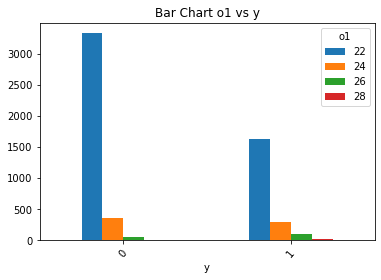

In [53]:
#Contengency Table between target variable y and o1

data_crosstab_o1 = pd.crosstab(train_df['y'],train_df['o1'], margins = False)
print(data_crosstab_o1)

#Bar Chart

data_crosstab_o1.plot.bar(rot=50, title="Bar Chart o1 vs y")
plt.show(block=True)

o2   6    7    8    9    10   11   12   13   14   15   16  17  18   19   20  \
y                                                                             
0   194  151  219  206  213  225  206  236  284  317  434  61  25  549  408   
1   104  104  112  147  110  120  110  125  123  180  244  10  21  294  229   

o2  23  24  25  28  
y                   
0    4   0   2  19  
1    0   2   0  44  


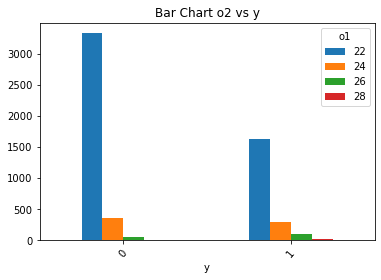

In [54]:
#Contengency Table between target variable y and o2

data_crosstab_o2 = pd.crosstab(train_df['y'],train_df['o2'], margins = False)
print(data_crosstab_o2)

#Bar Chart

data_crosstab_o1.plot.bar(rot=50, title="Bar Chart o2 vs y")
plt.show(block=True)

For all variables, y=0 seemed to have more frequencies for the observations, which is expected given that there is twice more companies that delivered the report on time (i.e., when y=0) than those who did not (i.e., when y=1). These contingency tables do not yield strong and definitive conclusions apart from the fact that the observation most recurrent when y=0 is also the most recurrent when y=1 (with the slight exception of c3).

#### Contengency table between our target variable and categorical and ordinal variables. In a general way it is safe to assume that is more frequente to have y=0 for both categorical and ordinal variables (report not delivered on time)

# Contigency tables between two categorical varaibles

c6     2   3
c4          
20  5237  74
26     1   0
28   230   0
30   290   0


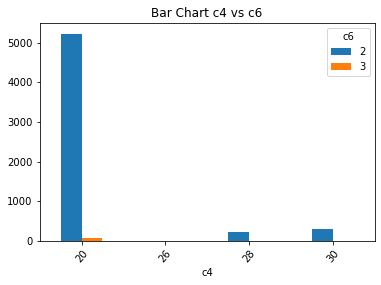

In [55]:
#Contengency Table between target variable y and o2

data_crosstab_c4_c6 = pd.crosstab(train_df['c4'],train_df['c6'], margins = False)
print(data_crosstab_c4_c6)

#Bar Chart

data_crosstab_c4_c6.plot.bar(rot=50, title="Bar Chart c4 vs c6")
plt.show(block=True)

# Chi-square Test between categorical/ordinal and Target Variable (y)

This section of our project aims to assess whether categorical variables are related to each other. In practice, it is the similar to the correlation analysis we have done for the numerical variables.

In this we use the chi-square test for independence, which compares two variables in a contingency table and it tests to see if the distributions of categorical variables differ from each another. 

The chi-squared statistic is a single number that tells us how much difference exists between our observed counts and the counts we would expect if there were no relationship at all in the population. A low value for chi-square means there is a high correlation between our two sets of data. In theory, if our observed and expected values were equal (“no difference”) then chi-square would be zero — an event that is unlikely to happen in real life. The null hypothesis for this test is that there is no relationship between the two categories.  If we reject it, i.e. if the p-value is lower than 5%, then there is a relationship (or association) between those categories (e.g. when c3 has "higher" numbers then c4 would tend to have "high" numbers too).

In [56]:
#!pip install researchpy
import researchpy   


crosstab, res, exp = researchpy.crosstab(train_df['y'], train_df['c3'], test='chi-square', expected_freqs=True)
print(res)
print(exp)

                 Chi-square test   results
0  Pearson Chi-square ( 72.0) =   147.0254
1                     p-value =     0.0000
2                  Cramer's V =     0.1588
            c3                                                       \
c3          1          2         3         8          10         11   
y                                                                     
0   120.981481  15.444444  7.078704  5.791667  61.134259  16.731481   
1    67.018519   8.555556  3.921296  3.208333  33.865741   9.268519   

                                                                               \
c3         13         14         15         16        17         18        20   
y                                                                               
0   19.305556  36.680556  18.662037  28.314815  5.148148  19.305556  6.435185   
1   10.694444  20.319444  10.337963  15.685185  2.851852  10.694444  3.564815   

                                                                  

In [57]:
crosstab, res, exp = researchpy.crosstab(train_df['y'], train_df['c4'], test='chi-square', expected_freqs=True)
print(res)
print(exp)

                Chi-square test   results
0  Pearson Chi-square ( 3.0) =   403.4277
1                    p-value =     0.0000
2                 Cramer's V =     0.2630
             c4                                 
c4           20        26          28         30
y                                               
0   3417.726852  0.643519  148.009259  186.62037
1   1893.273148  0.356481   81.990741  103.37963


In [58]:
crosstab, res, exp = researchpy.crosstab(train_df['y'], train_df['c5'], test='chi-square', expected_freqs=True)
print(res)
print(exp)

                Chi-square test  results
0  Pearson Chi-square ( 2.0) =    6.2635
1                    p-value =    0.0436
2                 Cramer's V =    0.0328
             c5                     
c5           22         24        26
y                                   
0   3710.527778  41.828704  0.643519
1   2055.472222  23.171296  0.356481


In [59]:
crosstab, res, exp = researchpy.crosstab(train_df['y'], train_df['c6'], test='chi-square', expected_freqs=True)
print(res)
print(exp)

                Chi-square test  results
0  Pearson Chi-square ( 1.0) =   12.3371
1                    p-value =    0.0004
2               Cramer's phi =    0.0460
            c6          
c6           2         3
y                       
0   3705.37963  47.62037
1   2052.62037  26.37963


In [60]:
crosstab, res, exp = researchpy.crosstab(train_df['y'], train_df['c7'], test='chi-square', expected_freqs=True)
print(res)
print(exp)

                Chi-square test   results
0  Pearson Chi-square ( 3.0) =   180.5169
1                    p-value =     0.0000
2                 Cramer's V =     0.1759
           c7                                    
c7          2           4          6            8
y                                                
0   20.592593  442.097222  568.87037  2721.439815
1   11.407407  244.902778  315.12963  1507.560185


In [61]:
crosstab, res, exp = researchpy.crosstab(train_df['y'], train_df['c8'], test='chi-square', expected_freqs=True)
print(res)
print(exp)

                Chi-square test  results
0  Pearson Chi-square ( 1.0) =    1.6627
1                    p-value =    0.1972
2               Cramer's phi =    0.0169
             c8          
c8            0         1
y                        
0   3751.069444  1.930556
1   2077.930556  1.069444


In [62]:
crosstab, res, exp = researchpy.crosstab(train_df['y'], train_df['c9'], test='chi-square', expected_freqs=True)
print(res)
print(exp)

                Chi-square test   results
0  Pearson Chi-square ( 4.0) =   408.7890
1                    p-value =     0.0000
2                 Cramer's V =     0.2648
             c9                                            
c9           20         24        26          28         30
y                                                          
0   3525.837963  48.907407  3.217593  148.009259  27.027778
1   1953.162037  27.092593  1.782407   81.990741  14.972222


In [63]:
crosstab, res, exp = researchpy.crosstab(train_df['y'], train_df['c10'], test='chi-square', expected_freqs=True)
print(res)
print(exp)

                Chi-square test  results
0  Pearson Chi-square ( 3.0) =   29.6893
1                    p-value =    0.0000
2                 Cramer's V =    0.0713
             c10                                
c10           22         24        26         28
y                                               
0    3650.037037  68.212963  0.643519  34.106481
1    2021.962963  37.787037  0.356481  18.893519


In [64]:
crosstab, res, exp = researchpy.crosstab(train_df['y'], train_df['c11'], test='chi-square', expected_freqs=True)
print(res)
print(exp)

                Chi-square test  results
0  Pearson Chi-square ( 3.0) =   10.8908
1                    p-value =    0.0123
2                 Cramer's V =    0.0432
          c11                                   
c11         1            2          3          4
y                                               
0    1.287037  3677.708333  62.421296  11.583333
1    0.712963  2037.291667  34.578704   6.416667


In [65]:
crosstab, res, exp = researchpy.crosstab(train_df['y'], train_df['c12'], test='chi-square', expected_freqs=True)
print(res)
print(exp)

                Chi-square test   results
0  Pearson Chi-square ( 3.0) =   210.6303
1                    p-value =     0.0000
2                 Cramer's V =     0.1900
           c12                                     
c12          2           4           6            8
y                                                  
0    23.166667  424.722222  552.138889  2752.972222
1    12.833333  235.277778  305.861111  1525.027778


In [66]:
crosstab, res, exp = researchpy.crosstab(train_df['y'], train_df['o1'], test='chi-square', expected_freqs=True)
print(res)
print(exp)

                Chi-square test   results
0  Pearson Chi-square ( 3.0) =   152.6095
1                    p-value =     0.0000
2                 Cramer's V =     0.1618
        o1                                   
o1      22          24          26         28
y                                            
0   3197.0  428.583333  102.962963  24.453704
1   1771.0  237.416667   57.037037  13.546296


In [67]:
crosstab, res, exp = researchpy.crosstab(train_df['y'], train_df['o2'], test='chi-square', expected_freqs=True)
print(res)
print(exp)

                 Chi-square test  results
0  Pearson Chi-square ( 18.0) =   70.7550
1                     p-value =    0.0000
2                  Cramer's V =    0.1101
            o2                                                             \
o2          6           7          8           9           10          11   
y                                                                           
0   191.768519  164.097222  213.00463  227.162037  207.856481  222.013889   
1   106.231481   90.902778  117.99537  125.837963  115.143519  122.986111   

                                                                           \
o2          12          13          14          15          16         17   
y                                                                           
0   203.351852  232.310185  261.912037  319.828704  436.305556  45.689815   
1   112.648148  128.689815  145.087963  177.171296  241.694444  25.310185   

                                                            

#### In general and making the chi-square test, the p-value assumes a very little value (near to zero). It can’t be stated that there are no differences between variables (aprimorar esta explicação)

# Chi-square test for two categorical varaibles

In [68]:
crosstab, res, exp = researchpy.crosstab(train_df['c3'], train_df['c6'], test='chi-square', expected_freqs=True)
print(res)
print(exp)

                 Chi-square test  results
0  Pearson Chi-square ( 72.0) =   65.7853
1                     p-value =    0.6835
2                  Cramer's V =    0.1062
            c6          
c6           2         3
c3                      
1   185.614540  2.385460
2    23.695473  0.304527
3    10.860425  0.139575
8     8.885802  0.114198
10   93.794582  1.205418
..         ...       ...
91    2.961934  0.038066
92    0.987311  0.012689
93   97.743827  1.256173
95   14.809671  0.190329
96  104.655007  1.344993

[73 rows x 2 columns]


In [69]:
train_df.loc[3323,'x15']

nan

# Importing dataset again

In [70]:
train_df

i  y      x1      x2      x3      x4      x5      x6      x7  \
0         2  0 -0.0229 -0.0250 -0.0173 -0.0269 -0.0181 -0.0330 -0.0248   
1         6  1 -0.0110 -0.0173 -0.0226 -0.0183 -0.0264 -0.0191  0.0136   
2         9  0 -0.0278 -0.0294 -0.0223 -0.0239 -0.0259 -0.0281 -0.0272   
3        14  0 -0.0292 -0.0309 -0.0233 -0.0248 -0.0276 -0.0296 -0.0274   
4        21  0 -0.0300 -0.0317 -0.0259 -0.0274 -0.0317 -0.0339 -0.0380   
...     ... ..     ...     ...     ...     ...     ...     ...     ...   
5827  11659  0 -0.0303 -0.0317 -0.0259 -0.0274 -0.0317 -0.0339 -0.0314   
5828  11660  1 -0.0189  0.0030 -0.0236 -0.0248 -0.0280 -0.0296 -0.0296   
5829  11662  1 -0.0124 -0.0229 -0.0231 -0.0235 -0.0272 -0.0274 -0.0322   
5830  11664  0 -0.0287 -0.0312 -0.0259 -0.0274 -0.0317 -0.0339 -0.0300   
5831  11666  0 -0.0306 -0.0324 -0.0259 -0.0274 -0.0317 -0.0339 -0.0368   

          x8      x9     x10     x11     x12     x13     x14     x15     x16  \
0    -0.0244 -0.0195 -0.0226 -0.0408 -0.0404 -0.0374 -0.0355 -0.0765 -0.0759   
1     0.0007 -0.0232 -0.0268  0.6620  0.5405  0.6047  0.4188  0.1723  0.1172   
2    -0.0266 -0.0250 -0.0277 -0.0417 -0.0407     NaN     NaN     NaN     NaN   
3    -0.0270 -0.0269 -0.0296 -0.0393 -0.0389 -0.0360 -0.0347 -0.0702 -0.0704   
4    -0.0375 -0.0224 -0.0243 -0.0417 -0.0407     NaN -0.0355 -0.0765     NaN   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
5827 -0.0307 -0.0262 -0.0286 -0.0410 -0.0381 -0.0367 -0.0343     NaN     NaN   
5828 -0.0256 -0.0114  0.0195 -0.0140  0.0139     NaN     NaN  0.1156  0.3598   
5829 -0.0293 -0.0009 -0.0164 -0.0417 -0.0404     NaN     NaN  0.1726  0.1728   
5830 -0.0292 -0.0248 -0.0287 -0.0417 -0.0386     NaN     NaN     NaN     NaN   
5831 -0.0394 -0.0239 -0.0241 -0.0417 -0.0407     NaN     NaN -0.0240 -0.0437   

         x17     x18     x19     x20     x21     x22     x23     x24     x25  \
0    -0.0369 -0.0354 -0.0273 -0.0280 -0.0877 -0.0916 -0.0930 -0.0944 -0.0191   
1     0.0757  0.0058  0.0456  0.0019  0.3212  0.2810  0.4200  0.3337 -0.0191   
2        NaN -0.0338 -0.0282 -0.0277 -0.0877 -0.0916 -0.0930 -0.0944 -0.0191   
3    -0.0365 -0.0359 -0.0290 -0.0294 -0.0756 -0.0796 -0.0802 -0.0820 -0.0191   
4        NaN     NaN -0.0279 -0.0294 -0.0877 -0.0916 -0.0930 -0.0944 -0.0191   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
5827 -0.0367 -0.0356 -0.0289 -0.0292     NaN -0.0916     NaN -0.0944 -0.0191   
5828 -0.0203 -0.0051 -0.0162 -0.0042  0.0206  0.1127  0.0253  0.1245 -0.0191   
5829  0.0926  0.0952 -0.0152  0.0042 -0.0396 -0.0556 -0.0665 -0.0426 -0.0191   
5830 -0.0255 -0.0339 -0.0208 -0.0282 -0.0877 -0.0916 -0.0930 -0.0944 -0.0191   
5831     NaN     NaN -0.0552 -0.0482 -0.0516 -0.0556 -0.0535 -0.0666 -0.0191   

         x26     x27     x28     x29     x30     x31     x32     x33      x34  \
0    -0.0173 -0.0109 -0.0105 -0.0196 -0.0171 -0.0169 -0.0133 -0.1744  -0.0219   
1    -0.0173 -0.0109 -0.0105 -0.0196 -0.0171 -0.0169 -0.0133 -0.1744  -0.0219   
2    -0.0173 -0.0109 -0.0105 -0.0196 -0.0171 -0.0169 -0.0133 -0.1744  -0.0219   
3    -0.0173 -0.0109 -0.0105 -0.0196 -0.0171 -0.0169 -0.0133 -0.1744  -0.0219   
4    -0.0173 -0.0109 -0.0105 -0.0196 -0.0171 -0.0169 -0.0133 -0.1744  -0.0219   
...      ...     ...     ...     ...     ...     ...     ...     ...      ...   
5827 -0.0131 -0.0109 -0.0105 -0.0195 -0.0171 -0.0169 -0.0069  2.0060  -0.0219   
5828 -0.0173  0.1104  0.2304 -0.0196 -0.0171  0.0314 -0.0027  3.9440  11.2800   
5829 -0.0173 -0.0109 -0.0105 -0.0196 -0.0171 -0.0169 -0.0095  2.0060  11.2800   
5830 -0.0173 -0.0109 -0.0105 -0.0196 -0.0171 -0.0169 -0.0133 -0.1744  -0.0219   
5831 -0.0173 -0.0109 -0.0105 -0.0196 -0.0171 -0.0169 -0.0133 -0.1744  -0.0219   

          x35     x36     x37     x38  x39  x40    c1   c2  c3  c4  c5  c6  \
0     -0.0085  0.1027 -1.9004  1.0000  1.0  0.0  4120  412  41  20  22   2   
1     -0.0085  0.1027 -2.2449  1.0000  1.0  0.0  4730  473  47  20  22

In [71]:
train_df.fillna(test_df.mean(), inplace=True)
train_df

i  y      x1      x2      x3      x4      x5      x6      x7  \
0         2  0 -0.0229 -0.0250 -0.0173 -0.0269 -0.0181 -0.0330 -0.0248   
1         6  1 -0.0110 -0.0173 -0.0226 -0.0183 -0.0264 -0.0191  0.0136   
2         9  0 -0.0278 -0.0294 -0.0223 -0.0239 -0.0259 -0.0281 -0.0272   
3        14  0 -0.0292 -0.0309 -0.0233 -0.0248 -0.0276 -0.0296 -0.0274   
4        21  0 -0.0300 -0.0317 -0.0259 -0.0274 -0.0317 -0.0339 -0.0380   
...     ... ..     ...     ...     ...     ...     ...     ...     ...   
5827  11659  0 -0.0303 -0.0317 -0.0259 -0.0274 -0.0317 -0.0339 -0.0314   
5828  11660  1 -0.0189  0.0030 -0.0236 -0.0248 -0.0280 -0.0296 -0.0296   
5829  11662  1 -0.0124 -0.0229 -0.0231 -0.0235 -0.0272 -0.0274 -0.0322   
5830  11664  0 -0.0287 -0.0312 -0.0259 -0.0274 -0.0317 -0.0339 -0.0300   
5831  11666  0 -0.0306 -0.0324 -0.0259 -0.0274 -0.0317 -0.0339 -0.0368   

          x8      x9     x10     x11     x12       x13       x14       x15  \
0    -0.0244 -0.0195 -0.0226 -0.0408 -0.0404 -0.037400 -0.035500 -0.076500   
1     0.0007 -0.0232 -0.0268  0.6620  0.5405  0.604700  0.418800  0.172300   
2    -0.0266 -0.0250 -0.0277 -0.0417 -0.0407  0.049154  0.046468  0.076212   
3    -0.0270 -0.0269 -0.0296 -0.0393 -0.0389 -0.036000 -0.034700 -0.070200   
4    -0.0375 -0.0224 -0.0243 -0.0417 -0.0407  0.049154 -0.035500 -0.076500   
...      ...     ...     ...     ...     ...       ...       ...       ...   
5827 -0.0307 -0.0262 -0.0286 -0.0410 -0.0381 -0.036700 -0.034300  0.076212   
5828 -0.0256 -0.0114  0.0195 -0.0140  0.0139  0.049154  0.046468  0.115600   
5829 -0.0293 -0.0009 -0.0164 -0.0417 -0.0404  0.049154  0.046468  0.172600   
5830 -0.0292 -0.0248 -0.0287 -0.0417 -0.0386  0.049154  0.046468  0.076212   
5831 -0.0394 -0.0239 -0.0241 -0.0417 -0.0407  0.049154  0.046468 -0.024000   

           x16       x17       x18     x19     x20       x21     x22  \
0    -0.075900 -0.036900 -0.035400 -0.0273 -0.0280 -0.087700 -0.0916   
1     0.117200  0.075700  0.005800  0.0456  0.0019  0.321200  0.2810   
2     0.074197  0.054652 -0.033800 -0.0282 -0.0277 -0.087700 -0.0916   
3    -0.070400 -0.036500 -0.035900 -0.0290 -0.0294 -0.075600 -0.0796   
4     0.074197  0.054652  0.080331 -0.0279 -0.0294 -0.087700 -0.0916   
...        ...       ...       ...     ...     ...       ...     ...   
5827  0.074197 -0.036700 -0.035600 -0.0289 -0.0292  0.049409 -0.0916   
5828  0.359800 -0.020300 -0.005100 -0.0162 -0.0042  0.020600  0.1127   
5829  0.172800  0.092600  0.095200 -0.0152  0.0042 -0.039600 -0.0556   
5830  0.074197 -0.025500 -0.033900 -0.0208 -0.0282 -0.087700 -0.0916   
5831 -0.043700  0.054652  0.080331 -0.0552 -0.0482 -0.051600 -0.0556   

           x23     x24     x25     x26     x27     x28     x29     x30  \
0    -0.093000 -0.0944 -0.0191 -0.0173 -0.0109 -0.0105 -0.0196 -0.0171   
1     0.420000  0.3337 -0.0191 -0.0173 -0.0109 -0.0105 -0.0196 -0.0171   
2    -0.093000 -0.0944 -0.0191 -0.0173 -0.0109 -0.0105 -0.0196 -0.0171   
3    -0.080200 -0.0820 -0.0191 -0.0173 -0.0109 -0.0105 -0.0196 -0.0171   
4    -0.093000 -0.0944 -0.0191 -0.0173 -0.0109 -0.0105 -0.0196 -0.0171   
...        ...     ...     ...     ...     ...     ...     ...     ...   
5827  0.041269 -0.0944 -0.0191 -0.0131 -0.0109 -0.0105 -0.0195 -0.0171   
5828  0.025300  0.1245 -0.0191 -0.0173  0.1104  0.2304 -0.0196 -0.0171   
5829 -0.066500 -0.0426 -0.0191 -0.0173 -0.0109 -0.0105 -0.0196 -0.0171   
5830 -0.093000 -0.0944 -0.0191 -0.0173 -0.0109 -0.0105 -0.0196 -0.0171   
5831 -0.053500 -0.0666 -0.0191 -0.0173 -0.0109 -0.0105 -0.0196 -0.0171   

         x31     x32     x33      x34      x35     x36       x37     x38  x39  \
0    -0.0169 -0.0133 -0.1744  -0.0219  -0.0085  0.1027 -1.900400  1.0000  1.0   
1    -0.0169 -0.0133 -0.1744  -0.0219  -0.0085  0.1027 -2.244900  1.0000  1.0   
2    -0.0169 -0.0133 -0.1744  -0.0219  -0.0085  0.1027 -2.429100  1.0000  1.0   
3    -0.0169 -0.0133 -0.1744  -0.0219  -0.0085  0.1027 -2.429100  1.0000  1.0   
4    -0.0169 -0.0133 -0.1

In [72]:
from scipy import stats
#Shapiro-Wilk test
columns = train_df.columns[2:42]

statistics = []
pvalue = []

for i in columns:
    #print([i])
    a,b = stats.kstest(train_df[[i]], 'norm')
    statistics.append(a)
    pvalue.append(b)
    
Shap = pd.DataFrame(list(zip(statistics, pvalue)), columns=['Statistics', 'P-value'], dtype=np.int8)
Shap.index=[columns]
Shap_norm = Shap[Shap['P-value']>0.01]
Shap
#print(Shap.round(2).to_latex())

Statistics  P-value
x1     1.000000        0
x2     1.000000        0
x3     1.000000        0
x4     1.000000        0
x5     1.000000        0
x6     1.000000        0
x7     1.000000        0
x8     1.000000        0
x9     1.000000        0
x10    1.000000        0
x11    1.000000        0
x12    1.000000        0
x13    1.000000        0
x14    1.000000        0
x15    1.000000        0
x16    1.000000        0
x17    1.000000        0
x18    1.000000        0
x19    1.000000        0
x20    1.000000        0
x21    1.000000        0
x22    1.000000        0
x23    1.000000        0
x24    1.000000        0
x25    1.000000        0
x26    1.000000        0
x27    1.000000        0
x28    1.000000        0
x29    1.000000        0
x30    1.000000        0
x31    1.000000        0
x32    1.000000        0
x33    1.000000        0
x34    1.000000        0
x35    1.000000        0
x36    1.000000        0
x37    1.000000        0
x38    0.841345        0
x39    0.841345        0
x40    0.999992        0

In [73]:
test_df_1=test_df.iloc[:,2:42]
test_df_1

x1      x2      x3      x4      x5      x6      x7      x8      x9  \
0     1.6382  1.5961  1.1843  1.1702  1.8396  1.8160  1.8586  1.8619  1.2993   
1    -0.0305 -0.0323 -0.0259 -0.0274 -0.0317 -0.0339 -0.0362 -0.0357 -0.0240   
2     0.0536  0.0586  0.0872  0.0811  0.1498  0.1392  0.1721  0.1469 -0.0167   
3     0.0726  0.0490  0.0617  0.0595  0.1100  0.1060  0.1164  0.0911  0.0391   
4    -0.0184 -0.0194 -0.0241 -0.0257 -0.0291 -0.0314 -0.0161 -0.0157 -0.0178   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
5829 -0.0276 -0.0296 -0.0230 -0.0239 -0.0300 -0.0313 -0.0309 -0.0300 -0.0228   
5830 -0.0295 -0.0309 -0.0259 -0.0274 -0.0316 -0.0337 -0.0311 -0.0303 -0.0253   
5831  0.0753  0.0590  0.0299  0.0422  0.0589  0.0787 -0.0221 -0.0139  0.1157   
5832 -0.0286 -0.0278 -0.0259 -0.0274 -0.0317 -0.0339 -0.0309 -0.0293 -0.0242   
5833 -0.0287 -0.0224 -0.0220 -0.0164 -0.0254 -0.0160 -0.0339 -0.0359 -0.0227   

         x10     x11     x12     x13     x14     x15     x16     x17     x18  \
0     1.1989  1.4800  1.4497  0.7275  0.6627  1.7837  2.0355  2.1920  1.6678   
1    -0.0263 -0.0362 -0.0355 -0.0357 -0.0340 -0.0416 -0.0414     NaN     NaN   
2    -0.0054  0.0576  0.0426  0.0319  0.0303  0.0083 -0.0097     NaN     NaN   
3     0.0149  0.3486 -0.0333  0.2388 -0.0321  0.2612 -0.0158  0.0603  0.4286   
4    -0.0197 -0.0176 -0.0232 -0.0248 -0.0296 -0.0061 -0.0131 -0.0280 -0.0325   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
5829 -0.0259 -0.0314 -0.0318     NaN     NaN  0.0210  0.0116 -0.0352 -0.0335   
5830 -0.0277 -0.0276 -0.0272 -0.0374 -0.0355 -0.0046 -0.0059 -0.0120 -0.0128   
5831  0.0947  0.1287  0.1737     NaN -0.0345  0.8600  1.3924  0.0808  0.0803   
5832 -0.0237 -0.0327 -0.0145     NaN     NaN     NaN     NaN -0.0334 -0.0251   
5833 -0.0117 -0.0417 -0.0167     NaN -0.0259 -0.0736  0.0168     NaN -0.0300   

         x19     x20     x21     x22     x23     x24     x25     x26     x27  \
0     1.5146  1.3637  1.3795  1.6511  1.8107  2.1954  1.6506  1.6662 -0.0109   
1    -0.0322 -0.0324 -0.0275 -0.0315 -0.0258 -0.0310 -0.0191 -0.0173 -0.0109   
2     0.0085  0.0121  0.0807  0.0767  0.0893  0.0812 -0.0191 -0.0173 -0.0109   
3    -0.0640 -0.0311  0.2491 -0.0556  0.2766 -0.0618 -0.0191 -0.0173 -0.0109   
4    -0.0219 -0.0235  0.0206  0.0166  0.0264  0.0218  0.0126 -0.0171 -0.0109   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
5829 -0.0258 -0.0264  0.0206  0.0166  0.0326  0.0226 -0.0191 -0.0173 -0.0069   
5830 -0.0244 -0.0258 -0.0516 -0.0556 -0.0546 -0.0571 -0.0191 -0.0173  0.0510   
5831  0.0664  0.1092  0.5377  1.3386  0.6271  0.0522 -0.0191 -0.0173  0.7362   
5832 -0.0260 -0.0236 -0.0877 -0.0916 -0.0930 -0.0944 -0.0191 -0.0173  0.0286   
5833 -0.0408 -0.0350 -0.0516 -0.0556 -0.0898 -0.0556 -0.0191  0.0489 -0.0109   

         x28     x29     x30     x31     x32     x33      x34      x35  \
0    -0.0105 -0.0196 -0.0171 -0.0169 -0.0133 -0.1744  -0.0219  -0.0085   
1    -0.0105 -0.0196 -0.0171 -0.0169 -0.0133 -0.1744  -0.0219  -0.0085   
2    -0.0105 -0.0196 -0.0171 -0.0169 -0.0133 -0.1744  -0.0219  -0.0085   
3    -0.0105 -0.0192 -0.0171 -0.0169 -0.0133  2.7327  15.0473  19.0623   
4    -0.0105 -0.0156 -0.0159 -0.0169 -0.0084 -0.1744  -0.0219  -0.0085   
...      ...     ...     ...     ...     ...     ...      ...      ...   
5829 -0.0063 -0.0196 -0.0171 -0.0168 -0.0131  3.4837  18.9402  23.9890   
5830  0.0490 -0.0196 -0.0171 -0.0147 -0.0100  4.2105  22.7075  28.7567   
5831  0.9297 -0.0196 -0.0145  0.2201  0.0384  2.0060  11.2800  14.2946   
5832  0.1052 -0.0196 -0.0171 -0.0169 -0.0133  6.4393  -0.0219  -0.0085   
5833 -0.0105 -0.0196 -0.0171 -0.0169 -0.0133 -0.1744  -0.0219  -0.0085   

         x36     x37   x38  x39     x40  
0     0.1027 -1.5658  1.00  1.0  0.0000  
1     0.1027 -2.3851  1.00  1.0  0.0000  
2     0.1027 -2.2264  1.00  1.0  0.0000  
3     4.7619 -1.6550  1.00  1.0  1.0986  
4     0.1027 -2.1728  1.00  

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Gonçalo\\Downloads\\correlation_spearmans.pdf'

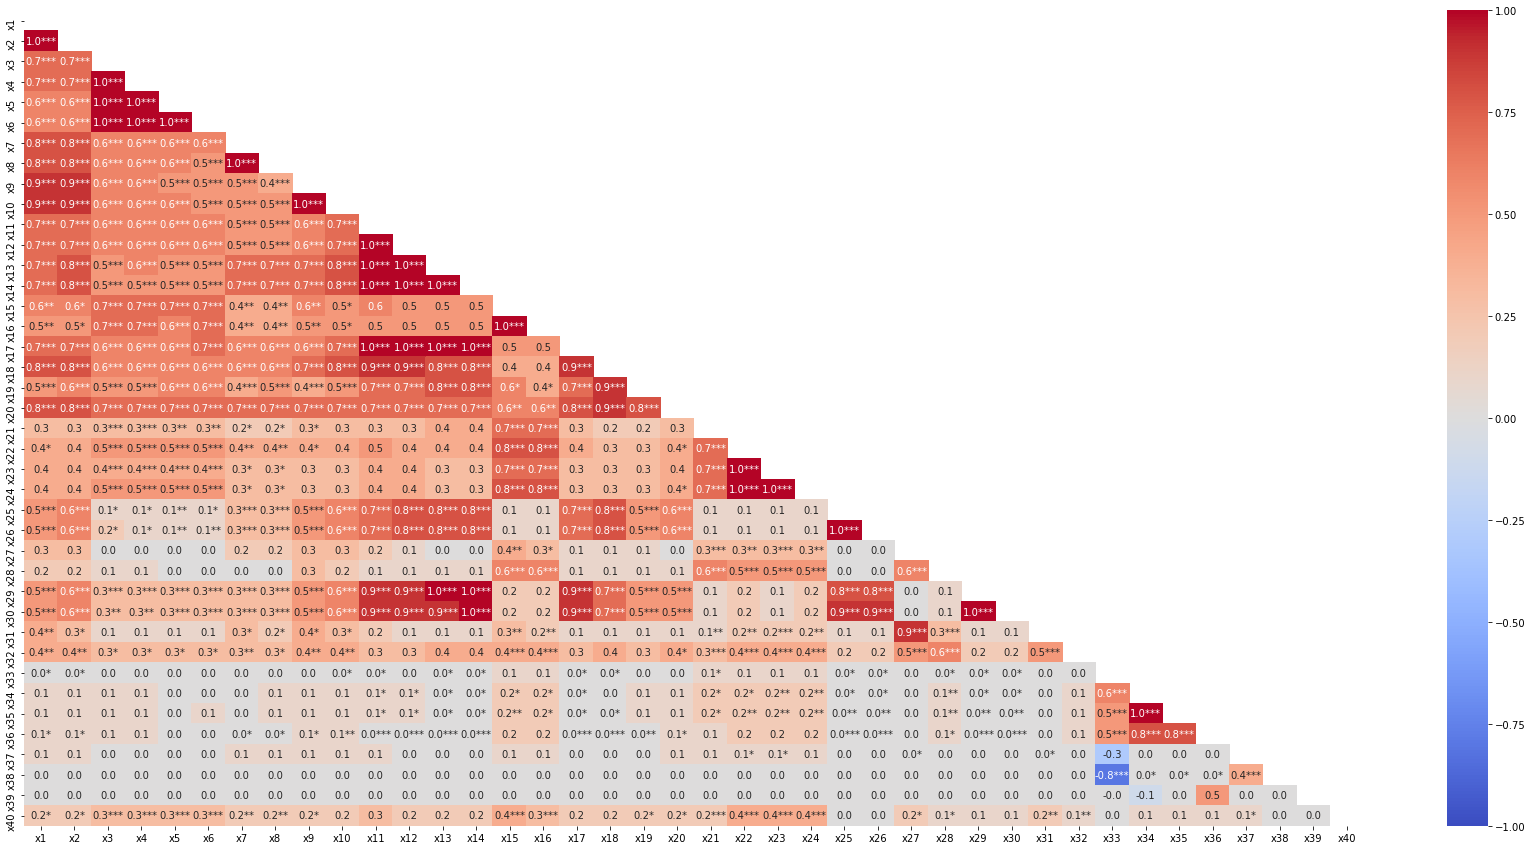

In [74]:
from scipy.stats import *
from scipy import stats
#call the correlation function, you could round the values if needed
test_df1=test_df.iloc[:,2:42]
df_c = test_df1.corr().round(1)
#get the p values
pval = df_c.corr(method=lambda x, y: spearmanr(x, y)[1]) 
#set the p values, *** for less than 0.001, ** for less than 0.01, * for less than 0.05
p = pval.applymap(lambda x: ''.join(['*' for t in [0.001,0.01,0.05] if x<=t]))
#dfc_2 below will give you the dataframe with correlation coefficients and p values
df_c2 = df_c.astype(str) + p

#you could also plot the correlation matrix using sns.heatmap if you want
#plot the triangle
matrix = np.triu(df_c.corr())
#convert to array for the heatmap
df_c3 = df_c2.to_numpy()

#plot the heatmap
plt.figure(figsize=(30,15))
sns.heatmap(df_c, annot = df_c3, fmt='', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask = matrix)
plt.savefig(r"C:\Users\Gonçalo\Downloads\correlation_spearmans.pdf")

In [75]:
corr = train_df.drop(['y','i', "c1","c2","c3","c4","c5","c6","c7","c8","c9","c10","c11","c12","o1","o2"], axis=1).corr()

In [76]:
#identifying the variables/features with correlations over 0.8 with others
correlated_features = set()
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.8: 
            colname = corr.columns[j] 
            correlated_features.add(colname)


print(correlated_features)
len(correlated_features)

{'x22', 'x33', 'x25', 'x23', 'x6', 'x4', 'x1', 'x9', 'x2', 'x10', 'x20', 'x31', 'x3', 'x19', 'x34', 'x13', 'x7', 'x21', 'x5', 'x29', 'x11', 'x27', 'x28', 'x15'}


24

In [77]:
#identifying the variables/features with correlations over 0.8 with others
correlated_features = set()
for i in range(len(test_df.columns)):
    for j in range(i):
        if abs(test_df.iloc[i, j]) > 0.8: 
            colname = test_df.columns[j] 
            correlated_features.add(colname)


print(correlated_features)
len(correlated_features)

{'x37', 'x22', 'x24', 'x33', 'i', 'x25', 'x12', 'x23', 'c11', 'x6', 'x4', 'x1', 'x32', 'x17', 'c7', 'x16', 'o1', 'c5', 'x18', 'x9', 'c10', 'x2', 'c3', 'x39', 'c4', 'x35', 'c6', 'c9', 'x10', 'x20', 'x31', 'x3', 'c2', 'x19', 'x8', 'x13', 'x38', 'x26', 'x7', 'x34', 'c1', 'x30', 'x21', 'x5', 'x14', 'x29', 'c12', 'x11', 'x36', 'x15'}


50

In [78]:
import pandas as pd
import numpy as np
import math

midwest = pd.read_csv('train.csv')

def calc_entropy(column):
    """
    Calculate entropy given a pandas series, list, or numpy array.
    """
    # Compute the counts of each unique value in the column
    counts = np.bincount(column)
    # Divide by the total column length to get a probability
    probabilities = counts / len(column)
    
    # Initialize the entropy to 0
    entropy = 0
    # Loop through the probabilities, and add each one to the total entropy
    for prob in probabilities:
        if prob > 0:
            # use log from math and set base to 2
            entropy += prob * math.log(prob, 2)
    
    return -entropy

In [79]:
def calc_information_gain(data, split_name, target_name):
    """
    Calculate information gain given a data set, column to split on, and target
    """
    # Calculate the original entropy
    original_entropy = calc_entropy(data[target_name])
    
    #Find the unique values in the column
    values = data[split_name].unique()
    
    
    # Make two subsets of the data, based on the unique values
    left_split = data[data[split_name] == values[0]]
    right_split = data[data[split_name] == values[1]]
    
    # Loop through the splits and calculate the subset entropies
    to_subtract = 0
    for subset in [left_split, right_split]:
        prob = (subset.shape[0] / data.shape[0]) 
        to_subtract += prob * calc_entropy(subset[target_name])
    
    # Return information gain
    return original_entropy - to_subtract

In [80]:
def highest_info_gain(columns):
  #Intialize an empty dictionary for information gains
  information_gains = {}
  
  #Iterate through each column name in our list
  for col in columns:
    #Find the information gain for the column
    information_gain = calc_information_gain(train_df, col, 'y')
    #Add the information gain to our dictionary using the column name as the ekey                                         
    information_gains[col] = information_gain
  
  #Return the key with the highest value                                          
  return max(information_gains, key=information_gains.get)

In [81]:
columns = ['x2', 'x4', 'x5', 'x6','x8','x10','x12','x23','x24','x30','x35','x36','c1','c2','c3','c4','c6','c12']
info_dic = {}
for col in columns:
    calc_info = calc_information_gain(train_df, col, 'y')
    info_dic[col] = calc_info

info_gain = pd.DataFrame(info_dic, index=[0])
info_gain[info_gain<0.2]
#info_gain

x2  x4  x5  x6  x8  x10  x12  x23  x24       x30       x35       x36  c1  \
0 NaN NaN NaN NaN NaN  NaN  NaN  NaN  NaN  0.156759  0.060047  0.068856 NaN   

   c2  c3        c4        c6  c12  
0 NaN NaN  0.101352  0.001728  NaN

In [ ]:
highest_info_gain(columns)

# Null imputation

### Replacing null data by column mean with same c7 value

In [84]:
print('before:', train_df['x4'][1398])
for index, row in train_df.iterrows():
    for c in train_df:
        #c = 'x4'
        if pd.isnull(train_df.loc[index, c]):
            replace = train_df[train_df['c7'] == row['c7']][c].mean(skipna=True)
            train_df.loc[index, c] = float(replace)
            #print(index, ':', row['x4'], ';')
            #print('replace: ', replace, ';')
        #break

print('after:', train_df['x4'][1398])

before: 0.01000769230769253
after: 0.01000769230769253


### Replacing null data by column mean

In [ ]:
print('before:', train_df['x4'][1398])
for index, row in train_df.iterrows():
    for c in train_df:
        if pd.isnull(train_df.loc[index, c]):
            replace = train_df[c].mean(skipna=True)
            train_df.loc[index, c] = float(replace)
print('after:', train_df['x4'][1398])

### Replacing null data by mean (of db?)

In [ ]:
train_df.fillna(train_df.mean(), inplace=True)

### Replacing null data by simple imputer

In [ ]:
from sklearn.impute import SimpleImputer
# retrieve the numpy array
values = train_df.values

# define the imputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
# transform the dataset
transformed_values = imputer.fit_transform(values)
# count the number of NaN values in each column
print('Missing: %d' % pd.isnull((transformed_values).sum()))
train_df = pd.DataFrame(data=transformed_values)
train_df

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline

### Setting train set

In [ ]:
x1 = train_df.iloc[: , 2:].values 
y1 = train_df.iloc[: , 1].values
x1.shape

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x1, y1, test_size=0.2, random_state=0)
X_train.shape

### Models

In [ ]:
import pickle
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=2)

# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print(X_test.shape)
# Decision Tree accuracy
result=metrics.accuracy_score(Y_test, y_pred)
print("Accuracy: %.2f%%" % (result*100.0))

filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:
# Import test dataset
test_df = pd.read_csv("test.csv",sep=';')

from sklearn.impute import SimpleImputer
# retrieve the numpy array
values = test_df.values

# define the imputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
# transform the dataset
transformed_values = imputer.fit_transform(values)
# count the number of NaN values in each column
print('Missing: %d' % pd.isnull((transformed_values).sum()))
test_df = pd.DataFrame(data=transformed_values)

xnew = test_df.iloc[: , 2:].values 
ynew = clf.predict(xnew)
ynew_df=pd.DataFrame(data=ynew)
ynew_df.to_csv('ynew.csv')

#for i in range(len(X_train_new)):
#    print("X=%s, Predicted=%s" % (X_train_new[i], ynew[i]))

In [ ]:
# define model
model = LinearDiscriminantAnalysis()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['solver'] = ['svd', 'lsqr', 'eigen']
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(x1, y1)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

In [ ]:
#shrinkage the dataset

from numpy import arange
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['shrinkage'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(x1, y1)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

In [ ]:
xnew.shape
X_test.shape

In [ ]:
#Data Preprocessing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Performing LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

#Training and Making Predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

ynew2 = classifier.predict(xnew)

#Evaluating the Performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
result = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (result*100.0))

In [ ]:
# define the model - LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
# define the modeling pipeline
pipeline = Pipeline(steps=[('imputer', imputer),('model', lda)])
# define the cross validation procedure
kfold = KFold(n_splits=4, shuffle=True, random_state=1)
# evaluate the model
result = cross_val_score(pipeline, x1, y1, cv=kfold, scoring='accuracy')
# report the mean performance
print('Accuracy: %.3f' % result.mean())

In [ ]:
#Holdout Validation Approach - Train and Test Set Split
model = LogisticRegression()

model.fit(X_train, Y_train)

result = model.score(X_test, Y_test)

print("Accuracy: %.2f%%" % (result*100.0))

In [ ]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=120)

# Instead of saving 10 scores in object named score and calculating mean
# We're just calculating the mean directly on the results
result = cross_val_score(knn, x1, y1, cv=10, scoring='accuracy').mean()
print("Accuracy: %.2f%%" % (result*100.0))

In [ ]:
# 10-fold cross-validation with logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
result = cross_val_score(logreg, x1, y1, cv=2, scoring='accuracy').mean()
print("Accuracy: %.2f%%" % (result*100.0))

In [ ]:
#K-fold Cross-Validation
kfold = KFold(n_splits=2)

model_kfold = LogisticRegression()

results_kfold = cross_val_score(model_kfold, x1, y1, cv=kfold)

print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

In [ ]:
#Stratified K-fold Cross-Validation
skfold = StratifiedKFold(n_splits=2)

model_skfold = LogisticRegression()

results_skfold = model_selection.cross_val_score(model_skfold, x1, y1, cv=skfold)

print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))

In [ ]:
#Leave One Out Cross-Validation (LOOCV)
loocv = model_selection.LeaveOneOut()

model_loocv = LogisticRegression()

results_loocv = cross_val_score(model_loocv, x1, y1, cv=loocv)

print("Accuracy: %.2f%%" % (results_loocv.mean()*100.0))

In [ ]:
#Repeated Random Test-Train Splits
kfold2 = model_selection.ShuffleSplit(n_splits=2, test_size=0.30, random_state=100)

model_shufflecv = LogisticRegression()

results_4 = cross_val_score(model_shufflecv, x1, y1, cv=kfold2)

print("Accuracy: %.2f%% (%.2f%%)" % (results_4.mean()*100.0, results_4.std()*100.0))

In [ ]:
np.any(np.isnan(train_df))